In [1]:
#Import libraries

import time
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
from scipy.sparse import csr_matrix
import logging
#from skbio.stats.composition import clr

import matplotlib.pyplot as plt
import matplotlib.axes as axes
#import os
#For CLR of ADTs
import scipy
import scipy.stats
from sklearn.preprocessing import scale
import os
import copy
import glob
import seaborn as sns
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)


sc.logging.print_versions() 
sc.settings.set_figure_params(dpi=100, dpi_save = 1000)

-----
anndata     0.9.2
scanpy      1.9.3
-----
PIL                 9.4.0
appnope             0.1.3
asttokens           NA
backcall            0.2.0
comm                0.1.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.8
decorator           5.1.1
executing           1.2.0
gmpy2               2.1.2
h5py                3.9.0
igraph              0.10.6
importlib_resources NA
ipykernel           6.25.1
jedi                0.19.0
joblib              1.3.2
kiwisolver          1.4.4
leidenalg           0.10.1
llvmlite            0.40.1
matplotlib          3.7.2
mpl_toolkits        NA
mpmath              1.3.0
natsort             8.4.0
numba               0.57.1
numpy               1.24.4
opt_einsum          v3.3.0
packaging           23.1
pandas              2.0.3
parso               0.8.3
patsy               0.5.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
platformdirs        3.10.0
prompt_toolkit      3.

In [2]:
import anndata

In [3]:
#Set font size of plot
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (4, 4),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

In [4]:
from matplotlib import colors
colors2 = plt.cm.Reds(np.linspace(0, 1, 512))
colors3 = plt.cm.Greys_r(np.linspace(0.8,1,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [5]:
#proj_path = "/wynton/group/fong/zenghua/prostate_analysis/"
proj_path = './'
# os.chdir(proj_path+'batch1_data_for_analysis/analysis/')

In [6]:
adata_file = proj_path + "all_samples_anndata_batch1.h5ad"
adata_batch1 = sc.read(adata_file)
adata_batch1
# AnnData object with n_obs × n_vars = 98428 × 2076

/opt/homebrew/Caskroom/miniforge/base/envs/bioinformatics/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 148454 × 33538
    obs: 'doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'platelet', 'RBC', 'sample_id'
    var: 'gene_ids', 'feature_types', 'genome'
    layers: 'raw'

In [7]:
adata_batch1.obs.index = adata_batch1.obs.index + adata_batch1.obs['pool'].str.split("_", ).str[2].str.replace("pool","-batch1-p")
adata_batch1.obs['sample_id'] = "batch1_"+adata_batch1.obs['sample_id'].astype('str')
adata_batch1

AnnData object with n_obs × n_vars = 148454 × 33538
    obs: 'doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'platelet', 'RBC', 'sample_id'
    var: 'gene_ids', 'feature_types', 'genome'
    layers: 'raw'

In [8]:
adata_file = proj_path + "raw_all_pool_data_batch2.h5ad"
adata_batch2 = sc.read(adata_file)
adata_batch2

AnnData object with n_obs × n_vars = 242206 × 33538
    obs: 'doublet', 'doublet_score', 'doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'original_barcode'

In [9]:
adata_batch2.obs

doublet  doublet_score  doublet_call  \
GATGAGGGTAAGTGGC-1-p1       0.0   6.742880e+00           0.0   
ACGCCAGTCCAATGGT-1-p1       0.0   3.027865e+01           0.0   
AACCATGAGGCTATCT-1-p1       1.0   9.955087e+01           1.0   
CTGTGCTGTCTAAAGA-1-p1       1.0   1.408147e+02           1.0   
TCAGATGAGGTACTCT-1-p1       0.0   3.027865e+01           0.0   
...                         ...            ...           ...   
GTGAAGGTCACAGGCC-1-p10      0.0   8.108465e-51           0.0   
GCATGCGGTGATAAAC-1-p10      0.0  4.255682e-101           0.0   
AGCATACCAGGATTGG-1-p10      0.0   6.981939e-03           0.0   
TTGCCGTGTCGCGGTT-1-p10      0.0   2.905518e-42           0.0   
TCAATCTAGAAGGTGA-1-p10      0.0   1.764962e-85           0.0   

                                     pool  percent_mito  percent_ribo  \
GATGAGGGTAAGTGGC-1-p1    185511_batch2_p1      0.058340      0.176188   
ACGCCAGTCCAATGGT-1-p1    185511_batch2_p1      0.021474      0.169047   
AACCATGAGGCTATCT-1-p1    185511_batch2_p1      0.029899      0.161341   
CTGTGCTGTCTAAAGA-1-p1    185511_batch2_p1      0.031160      0.157309   
TCAGATGAGGTACTCT-1-p1    185511_batch2_p1      0.027990      0.158172   
...                                   ...           ...           ...   
GTGAAGGTCACAGGCC-1-p10  185511_batch2_p10      0.021033      0.208413   
GCATGCGGTGATAAAC-1-p10  185511_batch2_p10      0.038095      0.207619   
AGCATACCAGGATTGG-1-p10  185511_batch2_p10      0.053435      0.208015   
TTGCCGTGTCGCGGTT-1-p10  185511_batch2_p10      0.048356      0.162476   
TCAATCTAGAAGGTGA-1-p10  185511_batch2_p10      0.051233      0.191651   

                        n_counts  n_genes    original_barcode  
GATGAGGGTAAGTGGC-1-p1    48749.0     6494  GATGAGGGTAAGTGGC-1  
ACGCCAGTCCAATGGT-1-p1    45591.0     7282  ACGCCAGTCCAATGGT-1  
AACCATGAGGCTATCT-1-p1    43312.0     6716  AACCATGAGGCTATCT-1  
CTGTGCTGTCTAAAGA-1-p1    42426.0     7197  CTGTGCTGTCTAAAGA-1  
TCAGATGAGGTACTCT-1-p1    42087.0     7374  TCAGATGAGGTACTCT-1  
...                          ...      ...                 ...  
GTGAAGGTCACAGGCC-1-p10     523.0      393  GTGAAGGTCACAGGCC-1  
GCATGCGGTGATAAAC-1-p10     525.0      390  GCATGCGGTGATAAAC-1  
AGCATACCAGGATTGG-1-p10     524.0      381  AGCATACCAGGATTGG-1  
TTGCCGTGTCGCGGTT-1-p10     517.0      386  TTGCCGTGTCGCGGTT-1  
TCAATCTAGAAGGTGA-1-p10     527.0      387  TCAATCTAGAAGGTGA-1  

[242206 rows x 9 columns]

In [10]:
sample_barcodes = pd.read_csv('./all_sample_barcodes.csv', index_col=0)
sample_barcodes = sample_barcodes.drop(['pool'], axis=1)
sample_barcodes

original_barcode            pool_barcode        sampleID
0     ACGATACAGTACCGGA-1   ACGATACAGTACCGGA-1-p1  30-03_barcodes
1     ACATGGTTCATCGATG-1   ACATGGTTCATCGATG-1-p1  30-03_barcodes
2     GAGTCCGAGATGTGGC-1   GAGTCCGAGATGTGGC-1-p1  30-03_barcodes
3     CACACAATCTGCGTAA-1   CACACAATCTGCGTAA-1-p1  30-03_barcodes
4     GGTGTTAGTTAAGATG-1   GGTGTTAGTTAAGATG-1-p1  30-03_barcodes
...                  ...                     ...             ...
1413  AAACCTGCAGCTCGAC-1  AAACCTGCAGCTCGAC-1-p10  26-01_barcodes
1414  TCAGCAATCCGCAAGC-1  TCAGCAATCCGCAAGC-1-p10  26-01_barcodes
1415  GTTCTCGTCTAGAGTC-1  GTTCTCGTCTAGAGTC-1-p10  26-01_barcodes
1416  GCACATAGTGGCAAAC-1  GCACATAGTGGCAAAC-1-p10  26-01_barcodes
1417  CAGCTGGCAAGTCATC-1  CAGCTGGCAAGTCATC-1-p10  26-01_barcodes

[174279 rows x 3 columns]

In [11]:
sample_barcodes = sample_barcodes.set_index(['pool_barcode'], drop=False)

In [12]:
len(sample_barcodes)

174279

In [13]:
adata_batch2 = adata_batch2[adata_batch2.obs.index.isin(sample_barcodes['pool_barcode'])]
adata_batch2

View of AnnData object with n_obs × n_vars = 172512 × 33538
    obs: 'doublet', 'doublet_score', 'doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'original_barcode'

In [14]:
adata_batch2.obs

doublet  doublet_score  doublet_call  \
GATGAGGGTAAGTGGC-1-p1       0.0   6.742880e+00           0.0   
GTTACAGAGCTAAACA-1-p1       0.0   2.462941e+01           0.0   
TCGGTAAAGAATTGTG-1-p1       0.0   5.163221e+00           0.0   
GACCAATCACAGCCCA-1-p1       0.0   6.742880e+00           0.0   
ACACCCTAGATCCTGT-1-p1       0.0   5.163221e+00           0.0   
...                         ...            ...           ...   
CAGCCGAGTATCTGCA-1-p10      0.0   6.305994e-72           0.0   
GGATTACGTAGTGAAT-1-p10      0.0   8.108465e-51           0.0   
CTACCCAGTCAATGTC-1-p10      0.0   8.885471e-46           0.0   
GTAACTGCATGGTCTA-1-p10      0.0   1.367650e-75           0.0   
AGCATACCAGGATTGG-1-p10      0.0   6.981939e-03           0.0   

                                     pool  percent_mito  percent_ribo  \
GATGAGGGTAAGTGGC-1-p1    185511_batch2_p1      0.058340      0.176188   
GTTACAGAGCTAAACA-1-p1    185511_batch2_p1      0.031377      0.164756   
TCGGTAAAGAATTGTG-1-p1    185511_batch2_p1      0.032695      0.209574   
GACCAATCACAGCCCA-1-p1    185511_batch2_p1      0.056356      0.171519   
ACACCCTAGATCCTGT-1-p1    185511_batch2_p1      0.029294      0.149565   
...                                   ...           ...           ...   
CAGCCGAGTATCTGCA-1-p10  185511_batch2_p10      0.034351      0.217557   
GGATTACGTAGTGAAT-1-p10  185511_batch2_p10      0.042146      0.187739   
CTACCCAGTCAATGTC-1-p10  185511_batch2_p10      0.017176      0.303435   
GTAACTGCATGGTCTA-1-p10  185511_batch2_p10      0.038023      0.180608   
AGCATACCAGGATTGG-1-p10  185511_batch2_p10      0.053435      0.208015   

                        n_counts  n_genes    original_barcode  
GATGAGGGTAAGTGGC-1-p1    48749.0     6494  GATGAGGGTAAGTGGC-1  
GTTACAGAGCTAAACA-1-p1    26166.0     5623  GTTACAGAGCTAAACA-1  
TCGGTAAAGAATTGTG-1-p1    25967.0     4482  TCGGTAAAGAATTGTG-1  
GACCAATCACAGCCCA-1-p1    25694.0     5524  GACCAATCACAGCCCA-1  
ACACCCTAGATCCTGT-1-p1    24237.0     4019  ACACCCTAGATCCTGT-1  
...                          ...      ...                 ...  
CAGCCGAGTATCTGCA-1-p10     524.0      366  CAGCCGAGTATCTGCA-1  
GGATTACGTAGTGAAT-1-p10     522.0      386  GGATTACGTAGTGAAT-1  
CTACCCAGTCAATGTC-1-p10     524.0      354  CTACCCAGTCAATGTC-1  
GTAACTGCATGGTCTA-1-p10     526.0      389  GTAACTGCATGGTCTA-1  
AGCATACCAGGATTGG-1-p10     524.0      381  AGCATACCAGGATTGG-1  

[172512 rows x 9 columns]

In [15]:
bc_index = (list(set(adata_batch2
.obs.index).intersection(set(sample_barcodes.pool_barcode))))

In [16]:
adata_batch2.obs = adata_batch2.obs.join(sample_barcodes.loc[bc_index], lsuffix="left")

In [17]:
adata_batch2.obs

doublet  doublet_score  doublet_call  \
GATGAGGGTAAGTGGC-1-p1       0.0   6.742880e+00           0.0   
GTTACAGAGCTAAACA-1-p1       0.0   2.462941e+01           0.0   
TCGGTAAAGAATTGTG-1-p1       0.0   5.163221e+00           0.0   
GACCAATCACAGCCCA-1-p1       0.0   6.742880e+00           0.0   
ACACCCTAGATCCTGT-1-p1       0.0   5.163221e+00           0.0   
...                         ...            ...           ...   
CAGCCGAGTATCTGCA-1-p10      0.0   6.305994e-72           0.0   
GGATTACGTAGTGAAT-1-p10      0.0   8.108465e-51           0.0   
CTACCCAGTCAATGTC-1-p10      0.0   8.885471e-46           0.0   
GTAACTGCATGGTCTA-1-p10      0.0   1.367650e-75           0.0   
AGCATACCAGGATTGG-1-p10      0.0   6.981939e-03           0.0   

                                     pool  percent_mito  percent_ribo  \
GATGAGGGTAAGTGGC-1-p1    185511_batch2_p1      0.058340      0.176188   
GTTACAGAGCTAAACA-1-p1    185511_batch2_p1      0.031377      0.164756   
TCGGTAAAGAATTGTG-1-p1    185511_batch2_p1      0.032695      0.209574   
GACCAATCACAGCCCA-1-p1    185511_batch2_p1      0.056356      0.171519   
ACACCCTAGATCCTGT-1-p1    185511_batch2_p1      0.029294      0.149565   
...                                   ...           ...           ...   
CAGCCGAGTATCTGCA-1-p10  185511_batch2_p10      0.034351      0.217557   
GGATTACGTAGTGAAT-1-p10  185511_batch2_p10      0.042146      0.187739   
CTACCCAGTCAATGTC-1-p10  185511_batch2_p10      0.017176      0.303435   
GTAACTGCATGGTCTA-1-p10  185511_batch2_p10      0.038023      0.180608   
AGCATACCAGGATTGG-1-p10  185511_batch2_p10      0.053435      0.208015   

                        n_counts  n_genes original_barcodeleft  \
GATGAGGGTAAGTGGC-1-p1    48749.0     6494   GATGAGGGTAAGTGGC-1   
GTTACAGAGCTAAACA-1-p1    26166.0     5623   GTTACAGAGCTAAACA-1   
TCGGTAAAGAATTGTG-1-p1    25967.0     4482   TCGGTAAAGAATTGTG-1   
GACCAATCACAGCCCA-1-p1    25694.0     5524   GACCAATCACAGCCCA-1   
ACACCCTAGATCCTGT-1-p1    24237.0     4019   ACACCCTAGATCCTGT-1   
...                          ...      ...                  ...   
CAGCCGAGTATCTGCA-1-p10     524.0      366   CAGCCGAGTATCTGCA-1   
GGATTACGTAGTGAAT-1-p10     522.0      386   GGATTACGTAGTGAAT-1   
CTACCCAGTCAATGTC-1-p10     524.0      354   CTACCCAGTCAATGTC-1   
GTAACTGCATGGTCTA-1-p10     526.0      389   GTAACTGCATGGTCTA-1   
AGCATACCAGGATTGG-1-p10     524.0      381   AGCATACCAGGATTGG-1   

                          original_barcode            pool_barcode  \
GATGAGGGTAAGTGGC-1-p1   GATGAGGGTAAGTGGC-1   GATGAGGGTAAGTGGC-1-p1   
GTTACAGAGCTAAACA-1-p1   GTTACAGAGCTAAACA-1   GTTACAGAGCTAAACA-1-p1   
TCGGTAAAGAATTGTG-1-p1   TCGGTAAAGAATTGTG-1   TCGGTAAAGAATTGTG-1-p1   
GACCAATCACAGCCCA-1-p1   GACCAATCACAGCCCA-1   GACCAATCACAGCCCA-1-p1   
ACACCCTAGATCCTGT-1-p1   ACACCCTAGATCCTGT-1   ACACCCTAGATCCTGT-1-p1   
...                                    ...                     ...   
CAGCCGAGTATCTGCA-1-p10  CAGCCGAGTATCTGCA-1  CAGCCGAGTATCTGCA-1-p10   
GGATTACGTAGTGAAT-1-p10  GGATTACGTAGTGAAT-1  GGATTACGTAGTGAAT-1-p10   
CTACCCAGTCAATGTC-1-p10  CTACCCAGTCAATGTC-1  CTACCCAGTCAATGTC-1-p10   
GTAACTGCATGGTCTA-1-p10  GTAACTGCATGGTCTA-1  GTAACTGCATGGTCTA-1-p10   
AGCATACCAGGATTGG-1-p10  AGCATACCAGGATTGG-1  AGCATACCAGGATTGG-1-p10   

                              sampleID  
GATGAGGGTAAGTGGC-1-p1   01-03_barcodes  
GTTACAGAGCTAAACA-1-p1   46-02_barcodes  
TCGGTAAAGAATTGTG-1-p1      HC_barcodes  
GACCAATCACAGCCCA-1-p1      HC_barcodes  
ACACCCTAGATCCTGT-1-p1   47-01_barcodes  
...                                ...  
CAGCCGAGTATCTGCA-1-p10  41-01_barcodes  
GGATTACGTAGTGAAT-1-p10  44-02_barcodes  
CTACCCAGTCAATGTC-1-p10     HC_barcodes  
GTAACTGCATGGTCTA-1-p10  42-03_barcodes  
AGCATACCAGGATTGG-1-p10  51-03_barcodes  

[172512 rows x 12 columns]

In [18]:
adata_batch2.obs.index =  adata_batch2.obs.index.str.replace("p","batch2-p")
adata_batch2

AnnData object with n_obs × n_vars = 172512 × 33538
    obs: 'doublet', 'doublet_score', 'doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'original_barcodeleft', 'original_barcode', 'pool_barcode', 'sampleID'

In [19]:
adata_batch2.obs

doublet  doublet_score  doublet_call  \
GATGAGGGTAAGTGGC-1-batch2-p1       0.0   6.742880e+00           0.0   
GTTACAGAGCTAAACA-1-batch2-p1       0.0   2.462941e+01           0.0   
TCGGTAAAGAATTGTG-1-batch2-p1       0.0   5.163221e+00           0.0   
GACCAATCACAGCCCA-1-batch2-p1       0.0   6.742880e+00           0.0   
ACACCCTAGATCCTGT-1-batch2-p1       0.0   5.163221e+00           0.0   
...                                ...            ...           ...   
CAGCCGAGTATCTGCA-1-batch2-p10      0.0   6.305994e-72           0.0   
GGATTACGTAGTGAAT-1-batch2-p10      0.0   8.108465e-51           0.0   
CTACCCAGTCAATGTC-1-batch2-p10      0.0   8.885471e-46           0.0   
GTAACTGCATGGTCTA-1-batch2-p10      0.0   1.367650e-75           0.0   
AGCATACCAGGATTGG-1-batch2-p10      0.0   6.981939e-03           0.0   

                                            pool  percent_mito  percent_ribo  \
GATGAGGGTAAGTGGC-1-batch2-p1    185511_batch2_p1      0.058340      0.176188   
GTTACAGAGCTAAACA-1-batch2-p1    185511_batch2_p1      0.031377      0.164756   
TCGGTAAAGAATTGTG-1-batch2-p1    185511_batch2_p1      0.032695      0.209574   
GACCAATCACAGCCCA-1-batch2-p1    185511_batch2_p1      0.056356      0.171519   
ACACCCTAGATCCTGT-1-batch2-p1    185511_batch2_p1      0.029294      0.149565   
...                                          ...           ...           ...   
CAGCCGAGTATCTGCA-1-batch2-p10  185511_batch2_p10      0.034351      0.217557   
GGATTACGTAGTGAAT-1-batch2-p10  185511_batch2_p10      0.042146      0.187739   
CTACCCAGTCAATGTC-1-batch2-p10  185511_batch2_p10      0.017176      0.303435   
GTAACTGCATGGTCTA-1-batch2-p10  185511_batch2_p10      0.038023      0.180608   
AGCATACCAGGATTGG-1-batch2-p10  185511_batch2_p10      0.053435      0.208015   

                               n_counts  n_genes original_barcodeleft  \
GATGAGGGTAAGTGGC-1-batch2-p1    48749.0     6494   GATGAGGGTAAGTGGC-1   
GTTACAGAGCTAAACA-1-batch2-p1    26166.0     5623   GTTACAGAGCTAAACA-1   
TCGGTAAAGAATTGTG-1-batch2-p1    25967.0     4482   TCGGTAAAGAATTGTG-1   
GACCAATCACAGCCCA-1-batch2-p1    25694.0     5524   GACCAATCACAGCCCA-1   
ACACCCTAGATCCTGT-1-batch2-p1    24237.0     4019   ACACCCTAGATCCTGT-1   
...                                 ...      ...                  ...   
CAGCCGAGTATCTGCA-1-batch2-p10     524.0      366   CAGCCGAGTATCTGCA-1   
GGATTACGTAGTGAAT-1-batch2-p10     522.0      386   GGATTACGTAGTGAAT-1   
CTACCCAGTCAATGTC-1-batch2-p10     524.0      354   CTACCCAGTCAATGTC-1   
GTAACTGCATGGTCTA-1-batch2-p10     526.0      389   GTAACTGCATGGTCTA-1   
AGCATACCAGGATTGG-1-batch2-p10     524.0      381   AGCATACCAGGATTGG-1   

                                 original_barcode            pool_barcode  \
GATGAGGGTAAGTGGC-1-batch2-p1   GATGAGGGTAAGTGGC-1   GATGAGGGTAAGTGGC-1-p1   
GTTACAGAGCTAAACA-1-batch2-p1   GTTACAGAGCTAAACA-1   GTTACAGAGCTAAACA-1-p1   
TCGGTAAAGAATTGTG-1-batch2-p1   TCGGTAAAGAATTGTG-1   TCGGTAAAGAATTGTG-1-p1   
GACCAATCACAGCCCA-1-batch2-p1   GACCAATCACAGCCCA-1   GACCAATCACAGCCCA-1-p1   
ACACCCTAGATCCTGT-1-batch2-p1   ACACCCTAGATCCTGT-1   ACACCCTAGATCCTGT-1-p1   
...                                           ...                     ...   
CAGCCGAGTATCTGCA-1-batch2-p10  CAGCCGAGTATCTGCA-1  CAGCCGAGTATCTGCA-1-p10   
GGATTACGTAGTGAAT-1-batch2-p10  GGATTACGTAGTGAAT-1  GGATTACGTAGTGAAT-1-p10   
CTACCCAGTCAATGTC-1-batch2-p10  CTACCCAGTCAATGTC-1  CTACCCAGTCAATGTC-1-p10   
GTAACTGCATGGTCTA-1-batch2-p10  GTAACTGCATGGTCTA-1  GTAACTGCATGGTCTA-1-p10   
AGCATACCAGGATTGG-1-batch2-p10  AGCATACCAGGATTGG-1  AGCATACCAGGATTGG-1-p10   

                                     sampleID  
GATGAGGGTAAGTGGC-1-batch2-p1   01-03_barcodes  
GTTACAGAGCTAAACA-1-batch2-p1   46-02_barcodes  
TCGGTAAAGAATTGTG-1-batch2-p1      HC_barcodes  
GACCAATCACAGCCCA-1-batch2-p1      HC_barcodes  
ACACCCTAGATCCTGT-1-batch2-p1   47-01_barcodes  
...                                       ...  
CAGCCGAGTATCTGCA-1-batch2-p10  41-01_barcodes  
GGATTACGTAGTGAAT-1-batch2-p10  

In [20]:
adata_batch2.obs['sample_id'] = adata_batch2.obs['pool'].str.split("_").str[2] + "_" +adata_batch2.obs['sampleID']
adata_batch2.obs['sample_id'] = adata_batch2.obs['sample_id'].str.replace("p","batch2_pool")

In [21]:
adata_batch2.obs

doublet  doublet_score  doublet_call  \
GATGAGGGTAAGTGGC-1-batch2-p1       0.0   6.742880e+00           0.0   
GTTACAGAGCTAAACA-1-batch2-p1       0.0   2.462941e+01           0.0   
TCGGTAAAGAATTGTG-1-batch2-p1       0.0   5.163221e+00           0.0   
GACCAATCACAGCCCA-1-batch2-p1       0.0   6.742880e+00           0.0   
ACACCCTAGATCCTGT-1-batch2-p1       0.0   5.163221e+00           0.0   
...                                ...            ...           ...   
CAGCCGAGTATCTGCA-1-batch2-p10      0.0   6.305994e-72           0.0   
GGATTACGTAGTGAAT-1-batch2-p10      0.0   8.108465e-51           0.0   
CTACCCAGTCAATGTC-1-batch2-p10      0.0   8.885471e-46           0.0   
GTAACTGCATGGTCTA-1-batch2-p10      0.0   1.367650e-75           0.0   
AGCATACCAGGATTGG-1-batch2-p10      0.0   6.981939e-03           0.0   

                                            pool  percent_mito  percent_ribo  \
GATGAGGGTAAGTGGC-1-batch2-p1    185511_batch2_p1      0.058340      0.176188   
GTTACAGAGCTAAACA-1-batch2-p1    185511_batch2_p1      0.031377      0.164756   
TCGGTAAAGAATTGTG-1-batch2-p1    185511_batch2_p1      0.032695      0.209574   
GACCAATCACAGCCCA-1-batch2-p1    185511_batch2_p1      0.056356      0.171519   
ACACCCTAGATCCTGT-1-batch2-p1    185511_batch2_p1      0.029294      0.149565   
...                                          ...           ...           ...   
CAGCCGAGTATCTGCA-1-batch2-p10  185511_batch2_p10      0.034351      0.217557   
GGATTACGTAGTGAAT-1-batch2-p10  185511_batch2_p10      0.042146      0.187739   
CTACCCAGTCAATGTC-1-batch2-p10  185511_batch2_p10      0.017176      0.303435   
GTAACTGCATGGTCTA-1-batch2-p10  185511_batch2_p10      0.038023      0.180608   
AGCATACCAGGATTGG-1-batch2-p10  185511_batch2_p10      0.053435      0.208015   

                               n_counts  n_genes original_barcodeleft  \
GATGAGGGTAAGTGGC-1-batch2-p1    48749.0     6494   GATGAGGGTAAGTGGC-1   
GTTACAGAGCTAAACA-1-batch2-p1    26166.0     5623   GTTACAGAGCTAAACA-1   
TCGGTAAAGAATTGTG-1-batch2-p1    25967.0     4482   TCGGTAAAGAATTGTG-1   
GACCAATCACAGCCCA-1-batch2-p1    25694.0     5524   GACCAATCACAGCCCA-1   
ACACCCTAGATCCTGT-1-batch2-p1    24237.0     4019   ACACCCTAGATCCTGT-1   
...                                 ...      ...                  ...   
CAGCCGAGTATCTGCA-1-batch2-p10     524.0      366   CAGCCGAGTATCTGCA-1   
GGATTACGTAGTGAAT-1-batch2-p10     522.0      386   GGATTACGTAGTGAAT-1   
CTACCCAGTCAATGTC-1-batch2-p10     524.0      354   CTACCCAGTCAATGTC-1   
GTAACTGCATGGTCTA-1-batch2-p10     526.0      389   GTAACTGCATGGTCTA-1   
AGCATACCAGGATTGG-1-batch2-p10     524.0      381   AGCATACCAGGATTGG-1   

                                 original_barcode            pool_barcode  \
GATGAGGGTAAGTGGC-1-batch2-p1   GATGAGGGTAAGTGGC-1   GATGAGGGTAAGTGGC-1-p1   
GTTACAGAGCTAAACA-1-batch2-p1   GTTACAGAGCTAAACA-1   GTTACAGAGCTAAACA-1-p1   
TCGGTAAAGAATTGTG-1-batch2-p1   TCGGTAAAGAATTGTG-1   TCGGTAAAGAATTGTG-1-p1   
GACCAATCACAGCCCA-1-batch2-p1   GACCAATCACAGCCCA-1   GACCAATCACAGCCCA-1-p1   
ACACCCTAGATCCTGT-1-batch2-p1   ACACCCTAGATCCTGT-1   ACACCCTAGATCCTGT-1-p1   
...                                           ...                     ...   
CAGCCGAGTATCTGCA-1-batch2-p10  CAGCCGAGTATCTGCA-1  CAGCCGAGTATCTGCA-1-p10   
GGATTACGTAGTGAAT-1-batch2-p10  GGATTACGTAGTGAAT-1  GGATTACGTAGTGAAT-1-p10   
CTACCCAGTCAATGTC-1-batch2-p10  CTACCCAGTCAATGTC-1  CTACCCAGTCAATGTC-1-p10   
GTAACTGCATGGTCTA-1-batch2-p10  GTAACTGCATGGTCTA-1  GTAACTGCATGGTCTA-1-p10   
AGCATACCAGGATTGG-1-batch2-p10  AGCATACCAGGATTGG-1  AGCATACCAGGATTGG-1-p10   

                                     sampleID                     sample_id  
GATGAGGGTAAGTGGC-1-batch2-p1   01-03_barcodes   batch2_pool1_01-03_barcodes  
GTTACAGAGCTAAACA-1-batch2-p1   46-02_barcodes   batch2_pool1_46-02_barcodes  
TCGGTAAAGAATTGTG-1-batch2-p1      HC_barcodes      batch2_pool1_HC_barcodes  
GACCAATCACAGCCCA-1-batch2-p1      HC_barcodes      batch2_pool1_HC_barcodes  
ACACCCTAGATCCTGT-1-batch2

In [22]:
adata_batch1.obs

doublet_call                 pool  percent_mito  \
TAAGAGAAGGACAGAA-1-batch1-p1           0.0  185511_batch1_pool1      0.082331   
CATTCGCCACATAACC-1-batch1-p1           0.0  185511_batch1_pool1      0.034073   
CATCGAATCTCAAGTG-1-batch1-p1           0.0  185511_batch1_pool1      0.031018   
TTAGGCAGTTCCGTCT-1-batch1-p1           0.0  185511_batch1_pool1      0.043002   
CGATTGATCGTTTAGG-1-batch1-p1           0.0  185511_batch1_pool1      0.074054   
...                                    ...                  ...           ...   
GTCACGGTCCCATTTA-1-batch1-p8           0.0  185511_batch1_pool8      0.049643   
ACTGTCCCATTTGCCC-1-batch1-p8           0.0  185511_batch1_pool8      0.006930   
GTGCTTCAGGGAAACA-1-batch1-p8           0.0  185511_batch1_pool8      0.013282   
CGTTCTGGTAAATGAC-1-batch1-p8           0.0  185511_batch1_pool8      0.001331   
GTCGGGTGTAAGGGCT-1-batch1-p8           0.0  185511_batch1_pool8      0.006011   

                              percent_ribo  n_counts  n_genes  platelet  \
TAAGAGAAGGACAGAA-1-batch1-p1      0.141228    6401.0     2010     False   
CATTCGCCACATAACC-1-batch1-p1      0.192456    9597.0     2757      True   
CATCGAATCTCAAGTG-1-batch1-p1      0.139312    7415.0     2273     False   
TTAGGCAGTTCCGTCT-1-batch1-p1      0.199786   14976.0     3370     False   
CGATTGATCGTTTAGG-1-batch1-p1      0.194253    3619.0     1599     False   
...                                    ...       ...      ...       ...   
GTCACGGTCCCATTTA-1-batch1-p8      0.392093    3364.0     1117     False   
ACTGTCCCATTTGCCC-1-batch1-p8      0.009702    1443.0      560      True   
GTGCTTCAGGGAAACA-1-batch1-p8      0.002251    4442.0      344     False   
CGTTCTGGTAAATGAC-1-batch1-p8      0.008873    2254.0      192     False   
GTCGGGTGTAAGGGCT-1-batch1-p8      0.006327    3161.0      232     False   

                                RBC                    sample_id  
TAAGAGAAGGACAGAA-1-batch1-p1  False  batch1_pool1_20-05_barcodes  
CATTCGCCACATAACC-1-batch1-p1  False  batch1_pool1_20-05_barcodes  
CATCGAATCTCAAGTG-1-batch1-p1  False  batch1_pool1_20-05_barcodes  
TTAGGCAGTTCCGTCT-1-batch1-p1   True  batch1_pool1_20-05_barcodes  
CGATTGATCGTTTAGG-1-batch1-p1  False  batch1_pool1_20-05_barcodes  
...                             ...                          ...  
GTCACGGTCCCATTTA-1-batch1-p8  False  batch1_pool8_20-01_barcodes  
ACTGTCCCATTTGCCC-1-batch1-p8  False  batch1_pool8_20-01_barcodes  
GTGCTTCAGGGAAACA-1-batch1-p8   True  batch1_pool8_20-01_barcodes  
CGTTCTGGTAAATGAC-1-batch1-p8   True  batch1_pool8_20-01_barcodes  
GTCGGGTGTAAGGGCT-1-batch1-p8   True  batch1_pool8_20-01_barcodes  

[148454 rows x 9 columns]

In [23]:
adata_batch1.obs['sample_id'].str.split("_").str[1]

TAAGAGAAGGACAGAA-1-batch1-p1    pool1
CATTCGCCACATAACC-1-batch1-p1    pool1
CATCGAATCTCAAGTG-1-batch1-p1    pool1
TTAGGCAGTTCCGTCT-1-batch1-p1    pool1
CGATTGATCGTTTAGG-1-batch1-p1    pool1
                                ...  
GTCACGGTCCCATTTA-1-batch1-p8    pool8
ACTGTCCCATTTGCCC-1-batch1-p8    pool8
GTGCTTCAGGGAAACA-1-batch1-p8    pool8
CGTTCTGGTAAATGAC-1-batch1-p8    pool8
GTCGGGTGTAAGGGCT-1-batch1-p8    pool8
Name: sample_id, Length: 148454, dtype: object

In [24]:
# adata_batch2.obs = adata_batch2.obs.join(sample_barcodes.loc[bc_index], rsuffix="right")

In [25]:
adata_batch2

AnnData object with n_obs × n_vars = 172512 × 33538
    obs: 'doublet', 'doublet_score', 'doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'original_barcodeleft', 'original_barcode', 'pool_barcode', 'sampleID', 'sample_id'

In [26]:
all_arms = sc.concat([adata_batch1,adata_batch2])
all_arms

AnnData object with n_obs × n_vars = 320966 × 33538
    obs: 'doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'sample_id'

In [27]:
all_arms.obs

doublet_call                 pool  \
TAAGAGAAGGACAGAA-1-batch1-p1            0.0  185511_batch1_pool1   
CATTCGCCACATAACC-1-batch1-p1            0.0  185511_batch1_pool1   
CATCGAATCTCAAGTG-1-batch1-p1            0.0  185511_batch1_pool1   
TTAGGCAGTTCCGTCT-1-batch1-p1            0.0  185511_batch1_pool1   
CGATTGATCGTTTAGG-1-batch1-p1            0.0  185511_batch1_pool1   
...                                     ...                  ...   
CAGCCGAGTATCTGCA-1-batch2-p10           0.0    185511_batch2_p10   
GGATTACGTAGTGAAT-1-batch2-p10           0.0    185511_batch2_p10   
CTACCCAGTCAATGTC-1-batch2-p10           0.0    185511_batch2_p10   
GTAACTGCATGGTCTA-1-batch2-p10           0.0    185511_batch2_p10   
AGCATACCAGGATTGG-1-batch2-p10           0.0    185511_batch2_p10   

                               percent_mito  percent_ribo  n_counts  n_genes  \
TAAGAGAAGGACAGAA-1-batch1-p1       0.082331      0.141228    6401.0     2010   
CATTCGCCACATAACC-1-batch1-p1       0.034073      0.192456    9597.0     2757   
CATCGAATCTCAAGTG-1-batch1-p1       0.031018      0.139312    7415.0     2273   
TTAGGCAGTTCCGTCT-1-batch1-p1       0.043002      0.199786   14976.0     3370   
CGATTGATCGTTTAGG-1-batch1-p1       0.074054      0.194253    3619.0     1599   
...                                     ...           ...       ...      ...   
CAGCCGAGTATCTGCA-1-batch2-p10      0.034351      0.217557     524.0      366   
GGATTACGTAGTGAAT-1-batch2-p10      0.042146      0.187739     522.0      386   
CTACCCAGTCAATGTC-1-batch2-p10      0.017176      0.303435     524.0      354   
GTAACTGCATGGTCTA-1-batch2-p10      0.038023      0.180608     526.0      389   
AGCATACCAGGATTGG-1-batch2-p10      0.053435      0.208015     524.0      381   

                                                  sample_id  
TAAGAGAAGGACAGAA-1-batch1-p1    batch1_pool1_20-05_barcodes  
CATTCGCCACATAACC-1-batch1-p1    batch1_pool1_20-05_barcodes  
CATCGAATCTCAAGTG-1-batch1-p1    batch1_pool1_20-05_barcodes  
TTAGGCAGTTCCGTCT-1-batch1-p1    batch1_pool1_20-05_barcodes  
CGATTGATCGTTTAGG-1-batch1-p1    batch1_pool1_20-05_barcodes  
...                                                     ...  
CAGCCGAGTATCTGCA-1-batch2-p10  batch2_pool10_41-01_barcodes  
GGATTACGTAGTGAAT-1-batch2-p10  batch2_pool10_44-02_barcodes  
CTACCCAGTCAATGTC-1-batch2-p10     batch2_pool10_HC_barcodes  
GTAACTGCATGGTCTA-1-batch2-p10  batch2_pool10_42-03_barcodes  
AGCATACCAGGATTGG-1-batch2-p10  batch2_pool10_51-03_barcodes  

[320966 rows x 7 columns]

In [28]:
adata = all_arms

The current adata.X is from doublet detection output, the raw is the original count matrix. Since we work with raw count matrix, we change to raw count

In [29]:
adata.layers['raw'] = adata.X

Remove doublet cells

In [30]:
adata = adata[adata.obs['doublet_call']!=1]

In [31]:
adata

View of AnnData object with n_obs × n_vars = 300086 × 33538
    obs: 'doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'sample_id'
    layers: 'raw'

In [32]:
# sc.pp.filter_genes(adata, min_counts=100)

In [33]:
# adata

In [34]:
adata.X[1:10,1:40].todense()

matrix([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
          0.,  0.,  0.,  0.,  0., 

In [35]:
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 300086 × 33538
    obs: 'doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'sample_id'
    layers: 'raw'

In [36]:
adata.X[1:10,1:40].todense()

matrix([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
          0.,  0.,  0.,  0.,  0., 

In [37]:
adata

AnnData object with n_obs × n_vars = 300086 × 33538
    obs: 'doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'sample_id'
    layers: 'raw'

In [38]:
adata.obs

doublet_call                 pool  \
TAAGAGAAGGACAGAA-1-batch1-p1            0.0  185511_batch1_pool1   
CATTCGCCACATAACC-1-batch1-p1            0.0  185511_batch1_pool1   
CATCGAATCTCAAGTG-1-batch1-p1            0.0  185511_batch1_pool1   
TTAGGCAGTTCCGTCT-1-batch1-p1            0.0  185511_batch1_pool1   
CGATTGATCGTTTAGG-1-batch1-p1            0.0  185511_batch1_pool1   
...                                     ...                  ...   
CAGCCGAGTATCTGCA-1-batch2-p10           0.0    185511_batch2_p10   
GGATTACGTAGTGAAT-1-batch2-p10           0.0    185511_batch2_p10   
CTACCCAGTCAATGTC-1-batch2-p10           0.0    185511_batch2_p10   
GTAACTGCATGGTCTA-1-batch2-p10           0.0    185511_batch2_p10   
AGCATACCAGGATTGG-1-batch2-p10           0.0    185511_batch2_p10   

                               percent_mito  percent_ribo  n_counts  n_genes  \
TAAGAGAAGGACAGAA-1-batch1-p1       0.082331      0.141228    6401.0     2010   
CATTCGCCACATAACC-1-batch1-p1       0.034073      0.192456    9597.0     2757   
CATCGAATCTCAAGTG-1-batch1-p1       0.031018      0.139312    7415.0     2273   
TTAGGCAGTTCCGTCT-1-batch1-p1       0.043002      0.199786   14976.0     3370   
CGATTGATCGTTTAGG-1-batch1-p1       0.074054      0.194253    3619.0     1599   
...                                     ...           ...       ...      ...   
CAGCCGAGTATCTGCA-1-batch2-p10      0.034351      0.217557     524.0      366   
GGATTACGTAGTGAAT-1-batch2-p10      0.042146      0.187739     522.0      386   
CTACCCAGTCAATGTC-1-batch2-p10      0.017176      0.303435     524.0      354   
GTAACTGCATGGTCTA-1-batch2-p10      0.038023      0.180608     526.0      389   
AGCATACCAGGATTGG-1-batch2-p10      0.053435      0.208015     524.0      381   

                                                  sample_id  
TAAGAGAAGGACAGAA-1-batch1-p1    batch1_pool1_20-05_barcodes  
CATTCGCCACATAACC-1-batch1-p1    batch1_pool1_20-05_barcodes  
CATCGAATCTCAAGTG-1-batch1-p1    batch1_pool1_20-05_barcodes  
TTAGGCAGTTCCGTCT-1-batch1-p1    batch1_pool1_20-05_barcodes  
CGATTGATCGTTTAGG-1-batch1-p1    batch1_pool1_20-05_barcodes  
...                                                     ...  
CAGCCGAGTATCTGCA-1-batch2-p10  batch2_pool10_41-01_barcodes  
GGATTACGTAGTGAAT-1-batch2-p10  batch2_pool10_44-02_barcodes  
CTACCCAGTCAATGTC-1-batch2-p10     batch2_pool10_HC_barcodes  
GTAACTGCATGGTCTA-1-batch2-p10  batch2_pool10_42-03_barcodes  
AGCATACCAGGATTGG-1-batch2-p10  batch2_pool10_51-03_barcodes  

[300086 rows x 7 columns]

In [39]:
adata.obs['sample_id'].str.split("_",expand = True).rename(columns = {0: 'arm', 1:'pool',2:'patient_sample', 3:'barcodes'})

arm    pool patient_sample  barcodes
TAAGAGAAGGACAGAA-1-batch1-p1   batch1   pool1          20-05  barcodes
CATTCGCCACATAACC-1-batch1-p1   batch1   pool1          20-05  barcodes
CATCGAATCTCAAGTG-1-batch1-p1   batch1   pool1          20-05  barcodes
TTAGGCAGTTCCGTCT-1-batch1-p1   batch1   pool1          20-05  barcodes
CGATTGATCGTTTAGG-1-batch1-p1   batch1   pool1          20-05  barcodes
...                               ...     ...            ...       ...
CAGCCGAGTATCTGCA-1-batch2-p10  batch2  pool10          41-01  barcodes
GGATTACGTAGTGAAT-1-batch2-p10  batch2  pool10          44-02  barcodes
CTACCCAGTCAATGTC-1-batch2-p10  batch2  pool10             HC  barcodes
GTAACTGCATGGTCTA-1-batch2-p10  batch2  pool10          42-03  barcodes
AGCATACCAGGATTGG-1-batch2-p10  batch2  pool10          51-03  barcodes

[300086 rows x 4 columns]

In [40]:
adata.obs = pd.concat([adata.obs,adata.obs['sample_id'].str.split("_",expand = True).rename(columns = {0: 'arm', 1:'pool_num',2:'patient_sample', 3:'barcodes'}).drop('barcodes', axis=1)], axis=1)
adata

AnnData object with n_obs × n_vars = 300086 × 33538
    obs: 'doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'sample_id', 'arm', 'pool_num', 'patient_sample'
    layers: 'raw'

In [41]:
adata.obs

doublet_call                 pool  \
TAAGAGAAGGACAGAA-1-batch1-p1            0.0  185511_batch1_pool1   
CATTCGCCACATAACC-1-batch1-p1            0.0  185511_batch1_pool1   
CATCGAATCTCAAGTG-1-batch1-p1            0.0  185511_batch1_pool1   
TTAGGCAGTTCCGTCT-1-batch1-p1            0.0  185511_batch1_pool1   
CGATTGATCGTTTAGG-1-batch1-p1            0.0  185511_batch1_pool1   
...                                     ...                  ...   
CAGCCGAGTATCTGCA-1-batch2-p10           0.0    185511_batch2_p10   
GGATTACGTAGTGAAT-1-batch2-p10           0.0    185511_batch2_p10   
CTACCCAGTCAATGTC-1-batch2-p10           0.0    185511_batch2_p10   
GTAACTGCATGGTCTA-1-batch2-p10           0.0    185511_batch2_p10   
AGCATACCAGGATTGG-1-batch2-p10           0.0    185511_batch2_p10   

                               percent_mito  percent_ribo  n_counts  n_genes  \
TAAGAGAAGGACAGAA-1-batch1-p1       0.082331      0.141228    6401.0     2010   
CATTCGCCACATAACC-1-batch1-p1       0.034073      0.192456    9597.0     2757   
CATCGAATCTCAAGTG-1-batch1-p1       0.031018      0.139312    7415.0     2273   
TTAGGCAGTTCCGTCT-1-batch1-p1       0.043002      0.199786   14976.0     3370   
CGATTGATCGTTTAGG-1-batch1-p1       0.074054      0.194253    3619.0     1599   
...                                     ...           ...       ...      ...   
CAGCCGAGTATCTGCA-1-batch2-p10      0.034351      0.217557     524.0      366   
GGATTACGTAGTGAAT-1-batch2-p10      0.042146      0.187739     522.0      386   
CTACCCAGTCAATGTC-1-batch2-p10      0.017176      0.303435     524.0      354   
GTAACTGCATGGTCTA-1-batch2-p10      0.038023      0.180608     526.0      389   
AGCATACCAGGATTGG-1-batch2-p10      0.053435      0.208015     524.0      381   

                                                  sample_id     arm pool_num  \
TAAGAGAAGGACAGAA-1-batch1-p1    batch1_pool1_20-05_barcodes  batch1    pool1   
CATTCGCCACATAACC-1-batch1-p1    batch1_pool1_20-05_barcodes  batch1    pool1   
CATCGAATCTCAAGTG-1-batch1-p1    batch1_pool1_20-05_barcodes  batch1    pool1   
TTAGGCAGTTCCGTCT-1-batch1-p1    batch1_pool1_20-05_barcodes  batch1    pool1   
CGATTGATCGTTTAGG-1-batch1-p1    batch1_pool1_20-05_barcodes  batch1    pool1   
...                                                     ...     ...      ...   
CAGCCGAGTATCTGCA-1-batch2-p10  batch2_pool10_41-01_barcodes  batch2   pool10   
GGATTACGTAGTGAAT-1-batch2-p10  batch2_pool10_44-02_barcodes  batch2   pool10   
CTACCCAGTCAATGTC-1-batch2-p10     batch2_pool10_HC_barcodes  batch2   pool10   
GTAACTGCATGGTCTA-1-batch2-p10  batch2_pool10_42-03_barcodes  batch2   pool10   
AGCATACCAGGATTGG-1-batch2-p10  batch2_pool10_51-03_barcodes  batch2   pool10   

                              patient_sample  
TAAGAGAAGGACAGAA-1-batch1-p1           20-05  
CATTCGCCACATAACC-1-batch1-p1           20-05  
CATCGAATCTCAAGTG-1-batch1-p1           20-05  
TTAGGCAGTTCCGTCT-1-batch1-p1           20-05  
CGATTGATCGTTTAGG-1-batch1-p1           20-05  
...                                      ...  
CAGCCGAGTATCTGCA-1-batch2-p10          41-01  
GGATTACGTAGTGAAT-1-batch2-p10          44-02  
CTACCCAGTCAATGTC-1-batch2-p10             HC  
GTAACTGCATGGTCTA-1-batch2-p10          42-03  
AGCATACCAGGATTGG-1-batch2-p10          51-03  

[300086 rows x 10 columns]

In [42]:
adata.obs['patient_sample'].str.split('-', expand = True).rename(columns = {0:'patient_id', 1:'time_point'})

patient_id time_point
TAAGAGAAGGACAGAA-1-batch1-p1          20         05
CATTCGCCACATAACC-1-batch1-p1          20         05
CATCGAATCTCAAGTG-1-batch1-p1          20         05
TTAGGCAGTTCCGTCT-1-batch1-p1          20         05
CGATTGATCGTTTAGG-1-batch1-p1          20         05
...                                  ...        ...
CAGCCGAGTATCTGCA-1-batch2-p10         41         01
GGATTACGTAGTGAAT-1-batch2-p10         44         02
CTACCCAGTCAATGTC-1-batch2-p10         HC       None
GTAACTGCATGGTCTA-1-batch2-p10         42         03
AGCATACCAGGATTGG-1-batch2-p10         51         03

[300086 rows x 2 columns]

In [43]:
adata.obs[['patient_id','time_point']] = adata.obs['patient_sample'].str.split('-', expand = True).rename(columns = {0:'patient_id', 1:'time_point'})
adata

AnnData object with n_obs × n_vars = 300086 × 33538
    obs: 'doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'sample_id', 'arm', 'pool_num', 'patient_sample', 'patient_id', 'time_point'
    layers: 'raw'

In [44]:
adata.obs.drop(['pool'], axis=1)

doublet_call  percent_mito  percent_ribo  \
TAAGAGAAGGACAGAA-1-batch1-p1            0.0      0.082331      0.141228   
CATTCGCCACATAACC-1-batch1-p1            0.0      0.034073      0.192456   
CATCGAATCTCAAGTG-1-batch1-p1            0.0      0.031018      0.139312   
TTAGGCAGTTCCGTCT-1-batch1-p1            0.0      0.043002      0.199786   
CGATTGATCGTTTAGG-1-batch1-p1            0.0      0.074054      0.194253   
...                                     ...           ...           ...   
CAGCCGAGTATCTGCA-1-batch2-p10           0.0      0.034351      0.217557   
GGATTACGTAGTGAAT-1-batch2-p10           0.0      0.042146      0.187739   
CTACCCAGTCAATGTC-1-batch2-p10           0.0      0.017176      0.303435   
GTAACTGCATGGTCTA-1-batch2-p10           0.0      0.038023      0.180608   
AGCATACCAGGATTGG-1-batch2-p10           0.0      0.053435      0.208015   

                               n_counts  n_genes  \
TAAGAGAAGGACAGAA-1-batch1-p1     6401.0     2010   
CATTCGCCACATAACC-1-batch1-p1     9597.0     2757   
CATCGAATCTCAAGTG-1-batch1-p1     7415.0     2273   
TTAGGCAGTTCCGTCT-1-batch1-p1    14976.0     3370   
CGATTGATCGTTTAGG-1-batch1-p1     3619.0     1599   
...                                 ...      ...   
CAGCCGAGTATCTGCA-1-batch2-p10     524.0      366   
GGATTACGTAGTGAAT-1-batch2-p10     522.0      386   
CTACCCAGTCAATGTC-1-batch2-p10     524.0      354   
GTAACTGCATGGTCTA-1-batch2-p10     526.0      389   
AGCATACCAGGATTGG-1-batch2-p10     524.0      381   

                                                  sample_id     arm pool_num  \
TAAGAGAAGGACAGAA-1-batch1-p1    batch1_pool1_20-05_barcodes  batch1    pool1   
CATTCGCCACATAACC-1-batch1-p1    batch1_pool1_20-05_barcodes  batch1    pool1   
CATCGAATCTCAAGTG-1-batch1-p1    batch1_pool1_20-05_barcodes  batch1    pool1   
TTAGGCAGTTCCGTCT-1-batch1-p1    batch1_pool1_20-05_barcodes  batch1    pool1   
CGATTGATCGTTTAGG-1-batch1-p1    batch1_pool1_20-05_barcodes  batch1    pool1   
...                                                     ...     ...      ...   
CAGCCGAGTATCTGCA-1-batch2-p10  batch2_pool10_41-01_barcodes  batch2   pool10   
GGATTACGTAGTGAAT-1-batch2-p10  batch2_pool10_44-02_barcodes  batch2   pool10   
CTACCCAGTCAATGTC-1-batch2-p10     batch2_pool10_HC_barcodes  batch2   pool10   
GTAACTGCATGGTCTA-1-batch2-p10  batch2_pool10_42-03_barcodes  batch2   pool10   
AGCATACCAGGATTGG-1-batch2-p10  batch2_pool10_51-03_barcodes  batch2   pool10   

                              patient_sample patient_id time_point  
TAAGAGAAGGACAGAA-1-batch1-p1           20-05         20         05  
CATTCGCCACATAACC-1-batch1-p1           20-05         20         05  
CATCGAATCTCAAGTG-1-batch1-p1           20-05         20         05  
TTAGGCAGTTCCGTCT-1-batch1-p1           20-05         20         05  
CGATTGATCGTTTAGG-1-batch1-p1           20-05         20         05  
...                                      ...        ...        ...  
CAGCCGAGTATCTGCA-1-batch2-p10          41-01         41         01  
GGATTACGTAGTGAAT-1-batch2-p10          44-02         44         02  
CTACCCAGTCAATGTC-1-batch2-p10             HC         HC       None  
GTAACTGCATGGTCTA-1-batch2-p10          42-03         42         03  
AGCATACCAGGATTGG-1-batch2-p10          51-03         51         03  

[300086 rows x 11 columns]

In [45]:
'PTPRC' in adata.var_names

True

In [46]:
adata.X

<300086x33538 sparse matrix of type '<class 'numpy.float32'>'
	with 387269876 stored elements in Compressed Sparse Row format>

In [47]:
print(len(np.unique(adata.obs['sample_id'])))
np.unique(adata.obs['patient_id'])

175


array(['01', '02', '03', '04', '06', '07', '10', '11', '13', '14', '15',
       '16', '17', '18', '19', '20', '23', '24', '25', '26', '27', '29',
       '30', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '49', '50', '51', '52', 'HC'],
      dtype=object)

Doing QC of cells and genes

In [48]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))

In [49]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


AnnData object with n_obs × n_vars = 300086 × 33538
    obs: 'doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'sample_id', 'arm', 'pool_num', 'patient_sample', 'patient_id', 'time_point', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'raw'

/opt/homebrew/Caskroom/miniforge/base/envs/bioinformatics/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


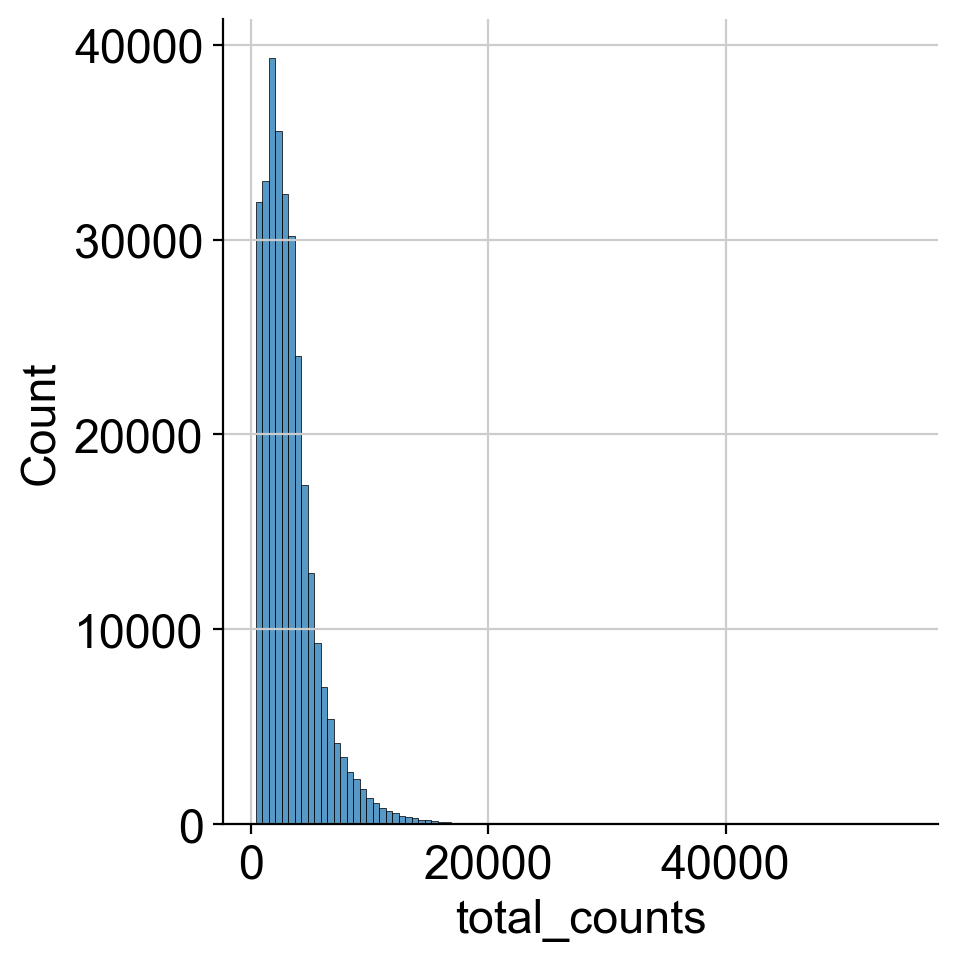

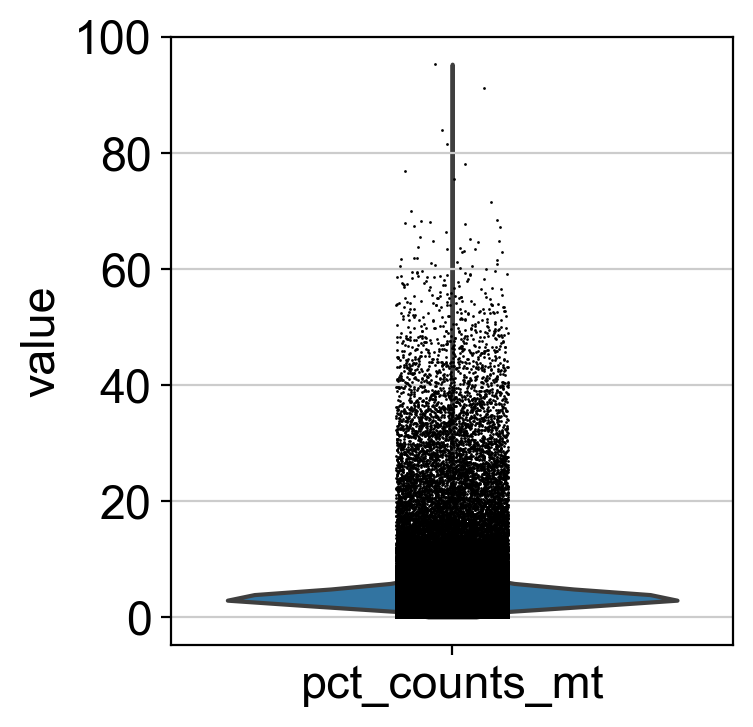

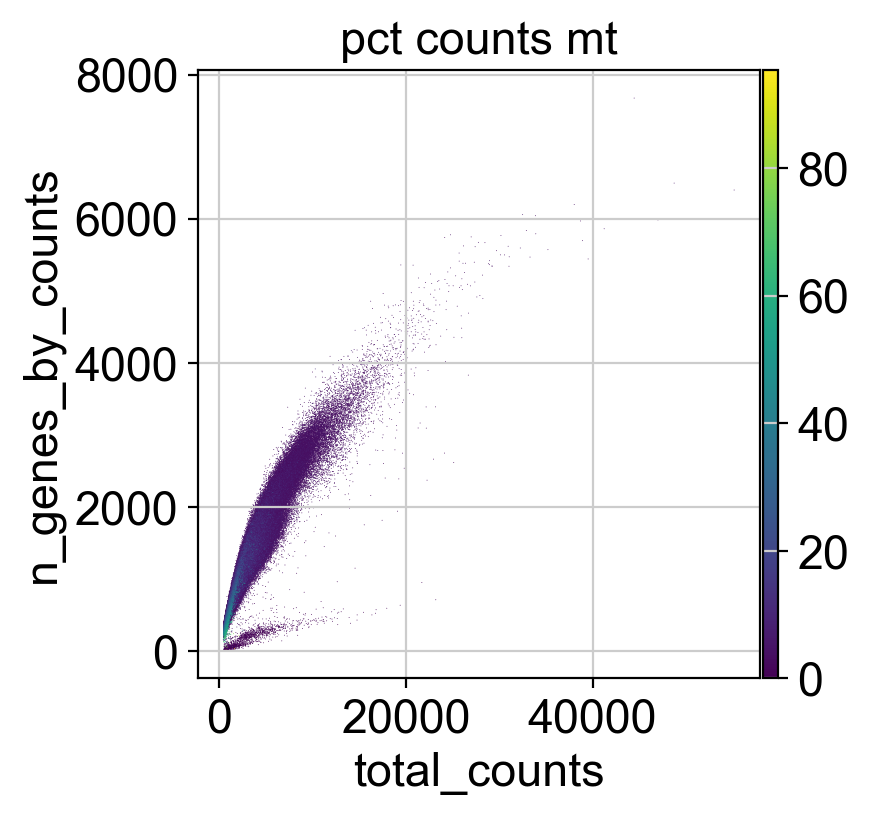

In [50]:
p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(adata, "pct_counts_mt")
p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [51]:
import numpy as np
import scanpy as sc
import seaborn as sns
from scipy.stats import median_abs_deviation

In [52]:
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier

In [53]:
adata.obs["outlier"] = (
    is_outlier(adata, "log1p_total_counts", 5)
    | is_outlier(adata, "log1p_n_genes_by_counts", 5)
    | is_outlier(adata, "pct_counts_in_top_20_genes", 5)
)
adata.obs.outlier.value_counts()

outlier
False    294351
True       5735
Name: count, dtype: int64

In [54]:
adata.obs["mt_outlier"] = is_outlier(adata, "pct_counts_mt", 3) | (
    adata.obs["pct_counts_mt"] > 5
)
adata.obs.mt_outlier.value_counts()

mt_outlier
False    235633
True      64453
Name: count, dtype: int64

In [55]:
print(f"Total number of cells: {adata.n_obs}")
adata = adata[(~adata.obs.outlier) & (~adata.obs.mt_outlier)].copy()

print(f"Number of cells after filtering of low quality cells: {adata.n_obs}")

Total number of cells: 300086
Number of cells after filtering of low quality cells: 233895


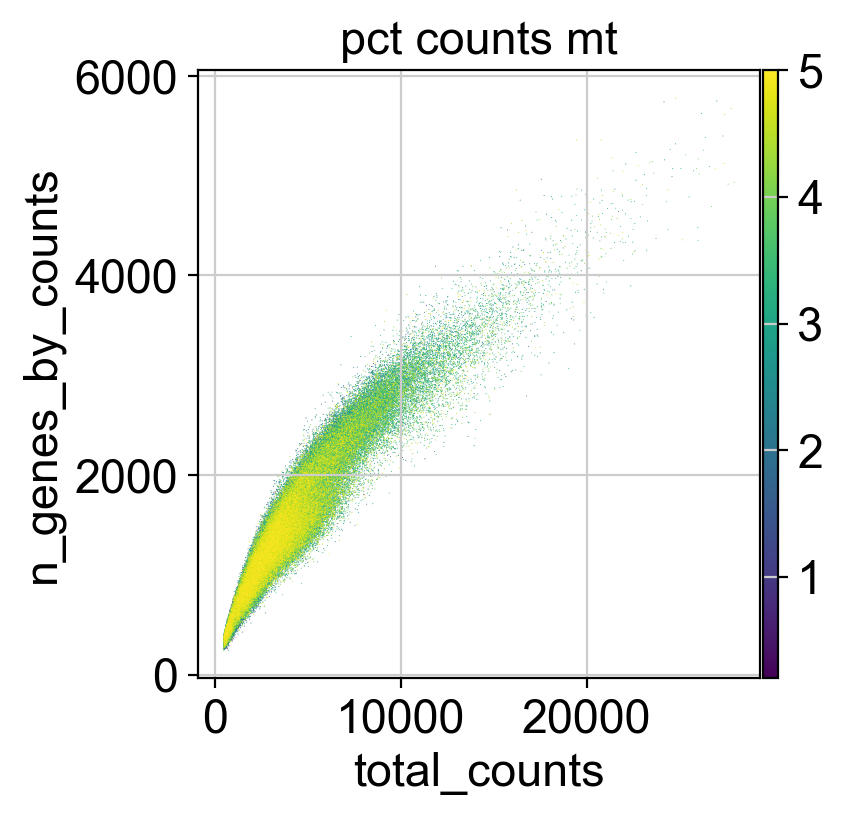

In [56]:
p1 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [57]:
adata = adata[adata.obs.pct_counts_mt < 10]

/opt/homebrew/Caskroom/miniforge/base/envs/bioinformatics/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


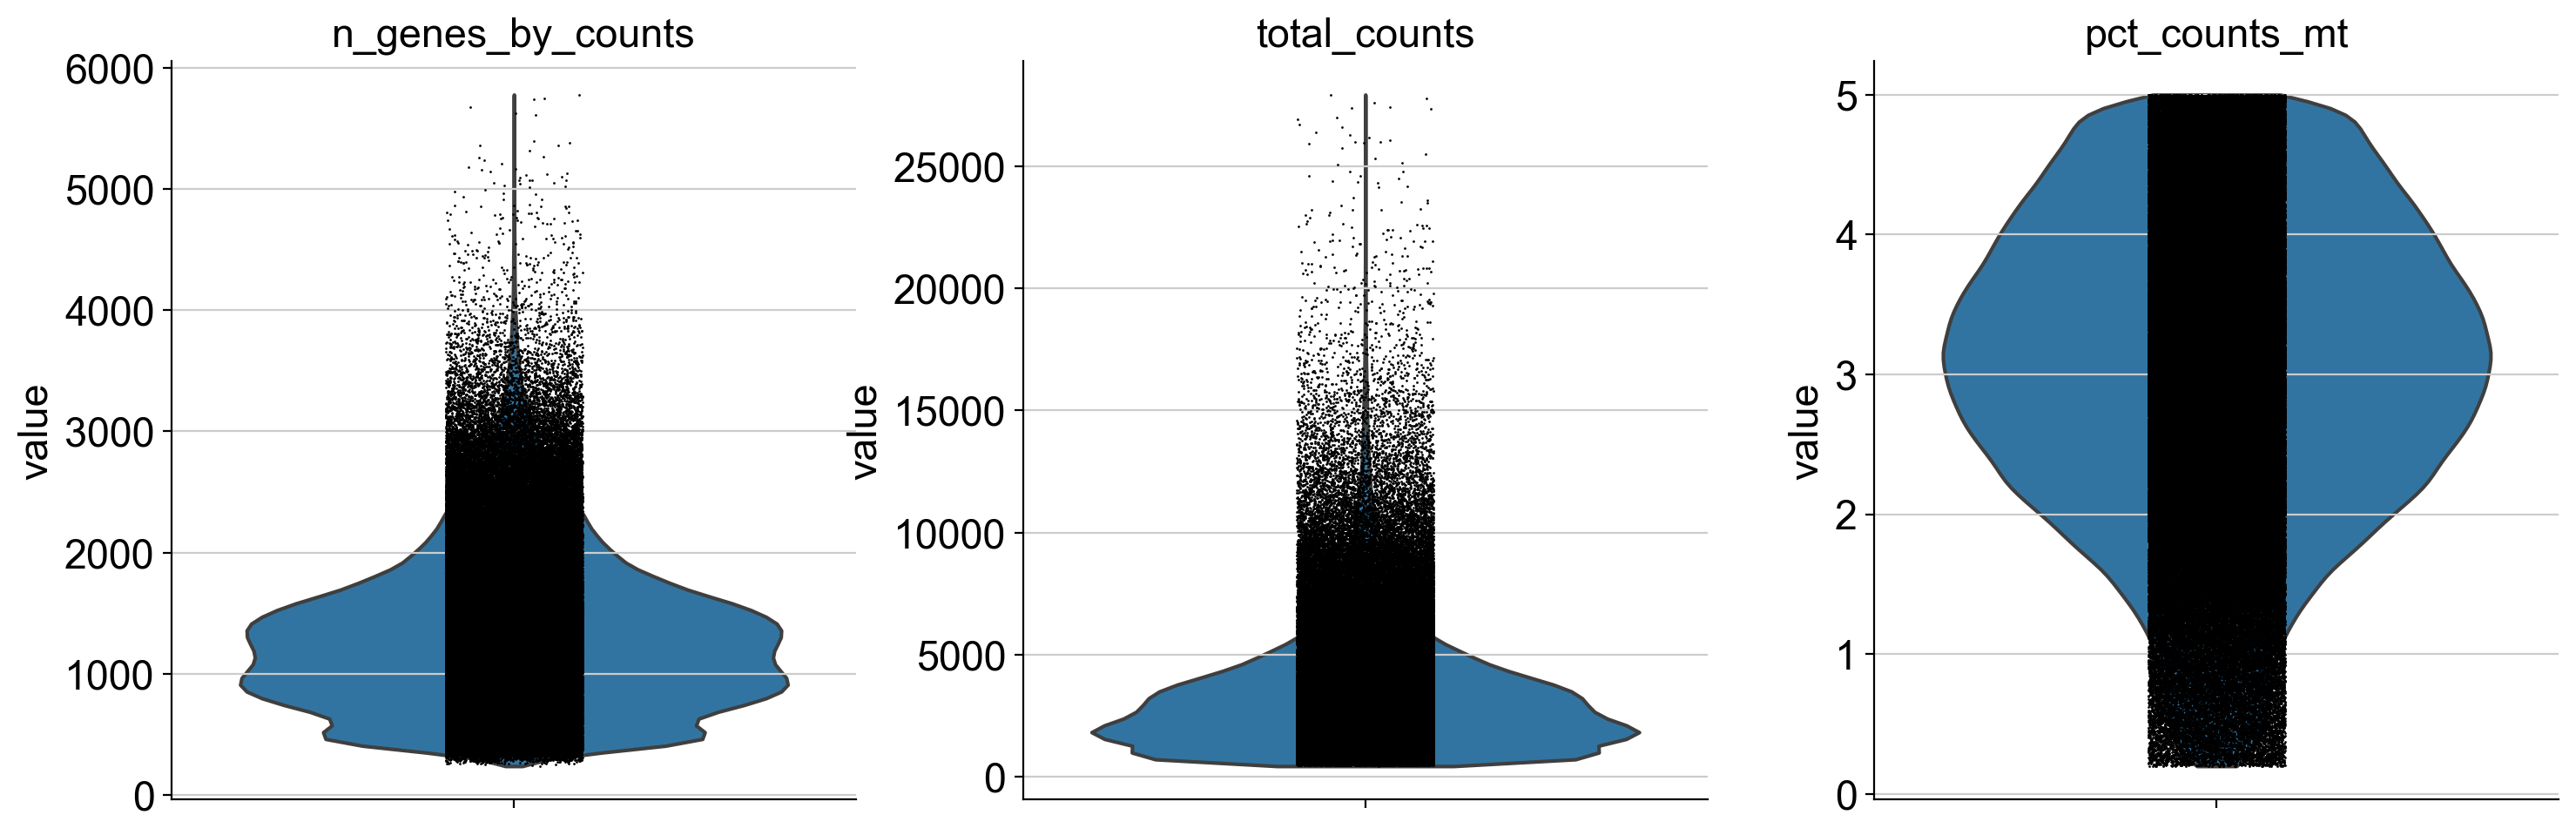

In [58]:
sc.pl.violin(
    adata, 
    [
     'n_genes_by_counts', 
     'total_counts', 
     'pct_counts_mt'
     ],
    multi_panel=True
)

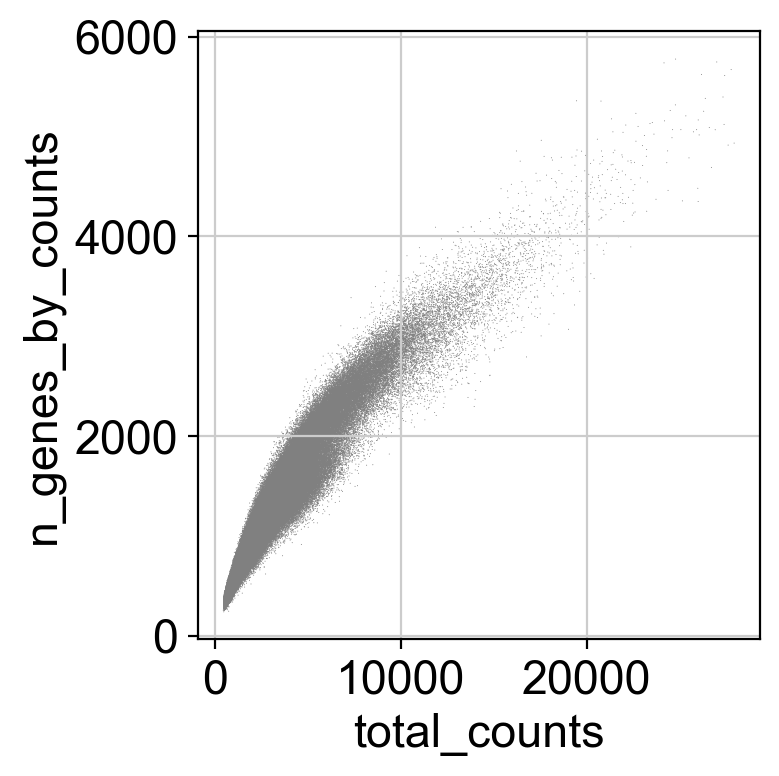

In [59]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts")

Batch correction: We do find highly variable genes for each batch, then do batch correction on those union genes

In [60]:
adata.obs.keys()

Index(['doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts',
       'n_genes', 'sample_id', 'arm', 'pool_num', 'patient_sample',
       'patient_id', 'time_point', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'pct_counts_in_top_20_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb',
       'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'],
      dtype='object')

In [61]:
# ix = [str(x) for x in range(adata.obs_names.shape[0])]
# obs_name = list(adata.obs_names)

In [62]:
# adata.obs_names = [ix[i]+"_"+obs_name[i] for i in range(adata.obs_names.shape[0])]

In [63]:
adata.obs

doublet_call                 pool  \
CATTCGCCACATAACC-1-batch1-p1            0.0  185511_batch1_pool1   
CATCGAATCTCAAGTG-1-batch1-p1            0.0  185511_batch1_pool1   
TTAGGCAGTTCCGTCT-1-batch1-p1            0.0  185511_batch1_pool1   
ACCCACTGTCTGCCAG-1-batch1-p1            0.0  185511_batch1_pool1   
GCTCTGTAGAGTGACC-1-batch1-p1            0.0  185511_batch1_pool1   
...                                     ...                  ...   
GTGAAGGAGTGTCCCG-1-batch2-p10           0.0    185511_batch2_p10   
CAGCCGAGTATCTGCA-1-batch2-p10           0.0    185511_batch2_p10   
GGATTACGTAGTGAAT-1-batch2-p10           0.0    185511_batch2_p10   
CTACCCAGTCAATGTC-1-batch2-p10           0.0    185511_batch2_p10   
GTAACTGCATGGTCTA-1-batch2-p10           0.0    185511_batch2_p10   

                               percent_mito  percent_ribo  n_counts  n_genes  \
CATTCGCCACATAACC-1-batch1-p1       0.034073      0.192456    9597.0     2757   
CATCGAATCTCAAGTG-1-batch1-p1       0.031018      0.139312    7415.0     2273   
TTAGGCAGTTCCGTCT-1-batch1-p1       0.043002      0.199786   14976.0     3370   
ACCCACTGTCTGCCAG-1-batch1-p1       0.043486      0.360938    5289.0     1724   
GCTCTGTAGAGTGACC-1-batch1-p1       0.043071      0.150047    8544.0     2535   
...                                     ...           ...       ...      ...   
GTGAAGGAGTGTCCCG-1-batch2-p10      0.017274      0.420345     521.0      283   
CAGCCGAGTATCTGCA-1-batch2-p10      0.034351      0.217557     524.0      366   
GGATTACGTAGTGAAT-1-batch2-p10      0.042146      0.187739     522.0      386   
CTACCCAGTCAATGTC-1-batch2-p10      0.017176      0.303435     524.0      354   
GTAACTGCATGGTCTA-1-batch2-p10      0.038023      0.180608     526.0      389   

                                                  sample_id     arm pool_num  \
CATTCGCCACATAACC-1-batch1-p1    batch1_pool1_20-05_barcodes  batch1    pool1   
CATCGAATCTCAAGTG-1-batch1-p1    batch1_pool1_20-05_barcodes  batch1    pool1   
TTAGGCAGTTCCGTCT-1-batch1-p1    batch1_pool1_20-05_barcodes  batch1    pool1   
ACCCACTGTCTGCCAG-1-batch1-p1    batch1_pool1_20-05_barcodes  batch1    pool1   
GCTCTGTAGAGTGACC-1-batch1-p1    batch1_pool1_20-05_barcodes  batch1    pool1   
...                                                     ...     ...      ...   
GTGAAGGAGTGTCCCG-1-batch2-p10     batch2_pool10_HC_barcodes  batch2   pool10   
CAGCCGAGTATCTGCA-1-batch2-p10  batch2_pool10_41-01_barcodes  batch2   pool10   
GGATTACGTAGTGAAT-1-batch2-p10  batch2_pool10_44-02_barcodes  batch2   pool10   
CTACCCAGTCAATGTC-1-batch2-p10     batch2_pool10_HC_barcodes  batch2   pool10   
GTAACTGCATGGTCTA-1-batch2-p10  batch2_pool10_42-03_barcodes  batch2   pool10   

                              patient_sample  ... log1p_total_counts_mt  \
CATTCGCCACATAACC-1-batch1-p1           20-05  ...              5.793014   
CATCGAATCTCAAGTG-1-batch1-p1           20-05  ...              5.442418   
TTAGGCAGTTCCGTCT-1-batch1-p1           20-05  ...              6.469250   
ACCCACTGTCTGCCAG-1-batch1-p1           20-05  ...              5.442418   
GCTCTGTAGAGTGACC-1-batch1-p1           20-05  ...              5.910797   
...                                      ...  ...                   ...   
GTGAAGGAGTGTCCCG-1-batch2-p10             HC  ...              2.302585   
CAGCCGAGTATCTGCA-1-batch2-p10          41-01  ...              2.944439   
GGATTACGTAGTGAAT-1-batch2-p10          44-02  ...              3.135494   
CTACCCAGTCAATGTC-1-batch2-p10             HC  ...              2.302585   
GTAACTGCATGGTCTA-1-batch2-p10          42-03  ...              3.044523   

                              pct_counts_mt  total_counts_ribo  \
CATTCGCCACATAACC-1-batch1-p1       3.407315             1847.0   
CATCGAATCTCAAGTG-1-batch1-p1       3.101821             1033.0   
TTAGGCAGTTCCGTCT-1-batch1-p1       4.300214             2992.0   
ACCCACTGTCTGCCAG-1-batch1-p1       4.348648             1909.0   
GCTCTGTAGAGTGACC-1-batch1-p1       4.307116             1282.

In [64]:
# adata.layers['raw'] = adata.X.copy()
# sc.pp.log1p(adata) # logaritmize

In [65]:
sc.pp.log1p(adata)

/opt/homebrew/Caskroom/miniforge/base/envs/bioinformatics/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [66]:
adata.X[0:10,0:10].todense()

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [67]:
adata.X = scipy.sparse.csr_matrix(adata.X)

In [68]:
adata

AnnData object with n_obs × n_vars = 233895 × 33538
    obs: 'doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'sample_id', 'arm', 'pool_num', 'patient_sample', 'patient_id', 'time_point', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p'
    layers: 'raw'

In [69]:
sc.pp.highly_variable_genes(
    adata, n_top_genes=5000, flavor = "cell_ranger", batch_key = 'pool'
)

adata.var

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:05)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


mt   ribo     hb  n_cells_by_counts  mean_counts  \
MIR1302-2HG  False  False  False                  6     0.000020   
FAM138A      False  False  False                  1     0.000003   
OR4F5        False  False  False                  0     0.000000   
AL627309.1   False  False  False                391     0.001313   
AL627309.3   False  False  False                 11     0.000037   
...            ...    ...    ...                ...          ...   
AC233755.2   False  False  False                382     0.021810   
AC233755.1   False  False  False                261     0.009877   
AC240274.1   False  False  False               1701     0.005775   
AC213203.1   False  False  False                  0     0.000000   
FAM231C      False  False  False                  1     0.000003   

             log1p_mean_counts  pct_dropout_by_counts  total_counts  \
MIR1302-2HG           0.000020              99.998001           6.0   
FAM138A               0.000003              99.999667           1.0   
OR4F5                 0.000000             100.000000           0.0   
AL627309.1            0.001312              99.869704         394.0   
AL627309.3            0.000037              99.996334          11.0   
...                        ...                    ...           ...   
AC233755.2            0.021576              99.872703        6545.0   
AC233755.1            0.009829              99.913025        2964.0   
AC240274.1            0.005758              99.433162        1733.0   
AC213203.1            0.000000             100.000000           0.0   
FAM231C               0.000003              99.999667           1.0   

             log1p_total_counts  highly_variable     means  dispersions  \
MIR1302-2HG            1.945910            False  0.000019     0.154026   
FAM138A                0.693147            False  0.000003     0.038508   
OR4F5                  0.000000            False  0.000000     0.000000   
AL627309.1             5.978886            False  0.000971     0.697687   
AL627309.3             2.484907            False  0.000022     0.269555   
...                         ...              ...       ...          ...   
AC233755.2             8.786610             True  0.001313     1.526069   
AC233755.1             7.994632             True  0.001037     1.821396   
AC240274.1             7.458186            False  0.004026     0.699649   
AC213203.1             0.000000            False  0.000000     0.000000   
FAM231C                0.693147            False  0.000000     0.000000   

             dispersions_norm  highly_variable_nbatches  \
MIR1302-2HG          0.000000                         0   
FAM138A              0.000000                         0   
OR4F5                0.000000                         0   
AL627309.1          10.110090                         1   
AL627309.3                NaN                         0   
...                       ...                       ...   
AC233755.2        1693.776855                        18   
AC233755.1        3031.078857                        16   
AC240274.1          -0.421150                         0   
AC213203.1           0.000000                         0   
FAM231C              0.000000                         0   

             highly_variable_intersection  
MIR1302-2HG                         False  
FAM138A                             False  
OR4F5                               False  
AL627309.1                          False  
AL627309.3                          False  
...                                   ...  
AC233755.2                           True  
AC233755.1                          False  
AC240274.1                          False  
AC213203.1                          False  
FAM231C                             False  

[33538 rows x 15 columns]

In [70]:
'PTPRC' in adata.var_names

True

In [71]:
adata = adata[:, adata.var['highly_variable']]
adata

View of AnnData object with n_obs × n_vars = 233895 × 5000
    obs: 'doublet_call', 'pool', 'percent_mito', 'percent_ribo', 'n_counts', 'n_genes', 'sample_id', 'arm', 'pool_num', 'patient_sample', 'patient_id', 'time_point', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg'
    layers: 'raw'

In [72]:
'PTPRC' in adata.var_names

False

### Plot known marker genes for certain cell types
These known markers can help you decide what cell type each cluster is likely to be

In [73]:
markers = ["PTPRC","CD3D","CD8A","CD4","IL7R",                #all Tcell
           "IL2RA","FOXP3","CCR7","GZMB","NKG7",              #Tcell,Tcell,Tcell,Tcell,NK
           "GNLY","NCAM1","CD19","MS4A1","MZB1",              #NK,?, B,B,Plasma
           "CD38","CD14","FCGR3A","FCGR2A","CSF1R",           #Tcell,Myeloid,Myeloid,Myeloid,Myeloid
           "CD68","HLA-DQA1","FLT3","FCER1A","KIT",           #Myeloid,Myeloid,Myeloid?,Myeloid,Mast
           "KLK3","PCA3","SPINK1",'TP63',"EPCAM",             #Prostate Carcinoma,Prostate Carcinoma,Prostate Carcinoma,Prostate Carcinoma,Prostate Epithelial
           "WFDC2",                                           #Prostate Epithelial
           "COL1A2","COL6A1","MYLK","VWF","PECAM1"]           #Fibroblasts,Fibroblasts,Fibroblasts,Endothelial,Endothelial

# First, we would like to check if there is any batch effect from data. If there is no batch effect then we don't need to do batch corrections. Note that batch correction may regress out the biological differences of samples, so we only do batch correction if needed.

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:21)


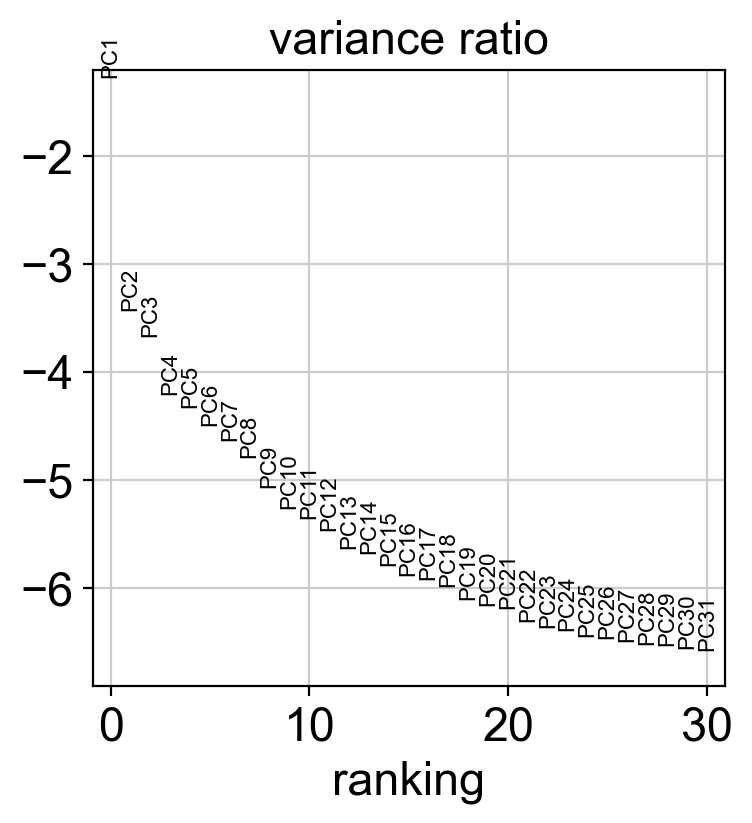

computing neighbors
    using 'X_pca' with n_pcs = 40


/opt/homebrew/Caskroom/miniforge/base/envs/bioinformatics/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/miniforge/base/envs/bioinformatics/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/homebrew/Caskroom/min

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:26)


In [74]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)


running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:09:16)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:05)
--> added 'pos', the PAGA positions (adata.uns['paga'])


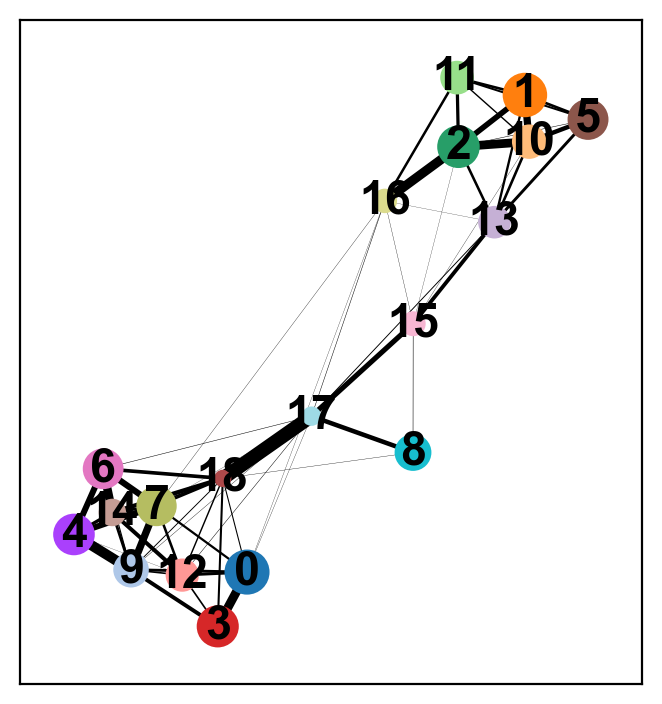

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:43)


In [75]:
sc.tl.leiden(adata, resolution=0.6)
sc.tl.paga(adata)
sc.pl.paga(adata, plot=True)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

/opt/homebrew/Caskroom/miniforge/base/envs/bioinformatics/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/Caskroom/miniforge/base/envs/bioinformatics/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


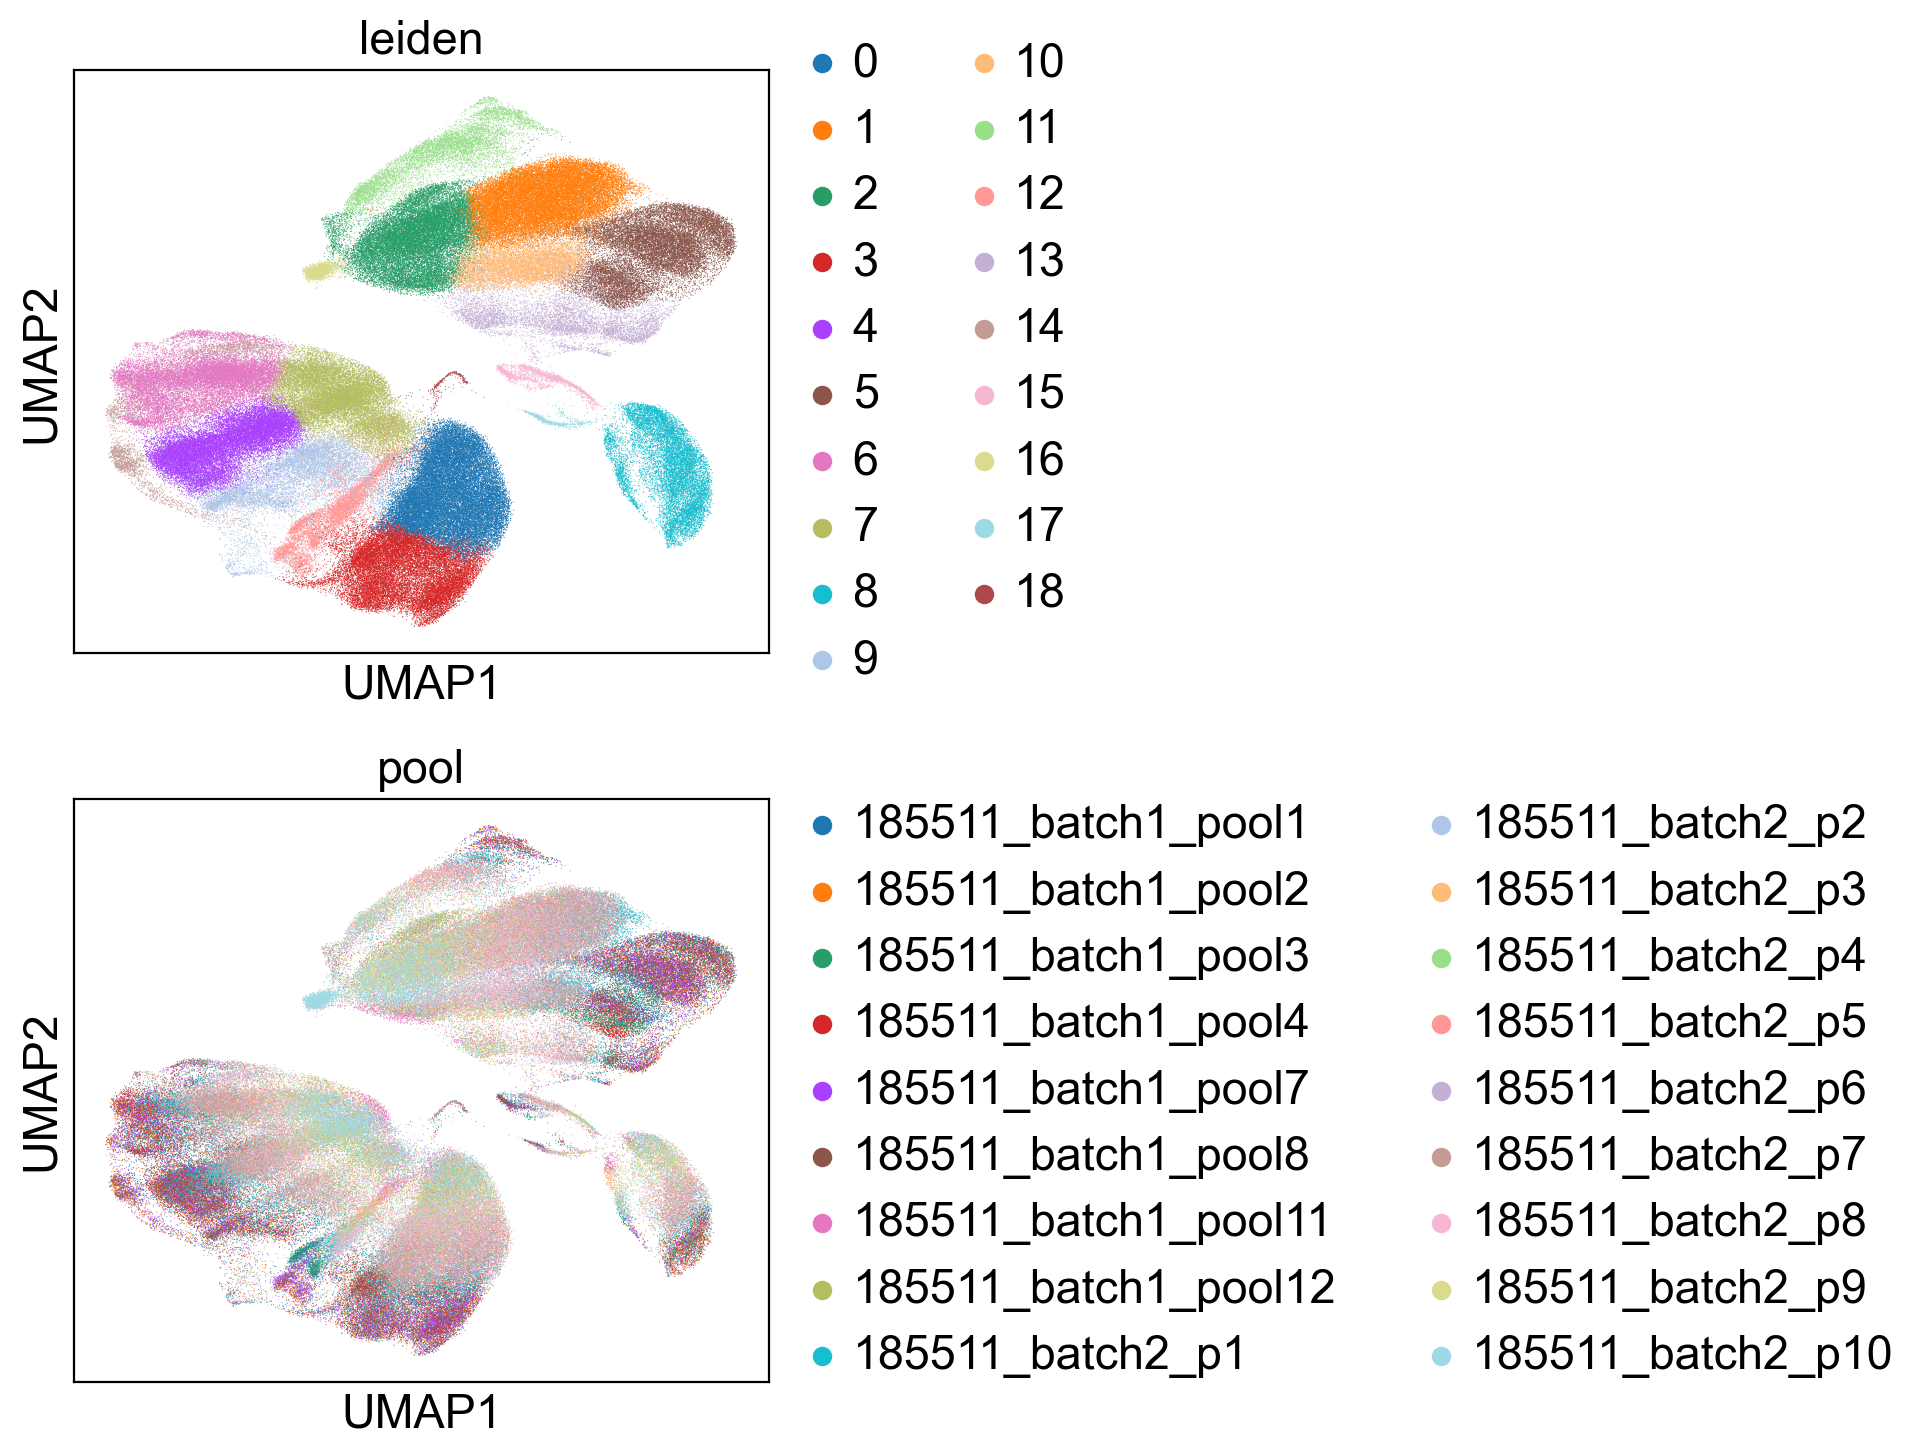

In [76]:
sc.pl.umap(adata, color=['leiden','pool'], ncols = 1, vmin = 0, vmax = 1, save = False)

# The umap above shows that there is some batch effects on the data. We cannot use the data as it is, we need to do some batch correction to remove the batch effects

In this work, we apply harmony method to correct batch effect, we do at the pool level which is the smallest level to correct the batch effects (not consider time differences, patients's samples). Of courses, we may move to finer batch correction if the lowest level does not work well.

In [77]:
import scanpy.external as sce
sce.pp.harmony_integrate(adata, 'pool')

2023-11-30 17:50:58,355 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-11-30 17:51:40,395 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-11-30 17:51:41,161 - harmonypy - INFO - Iteration 1 of 10
2023-11-30 17:52:54,616 - harmonypy - INFO - Iteration 2 of 10
2023-11-30 17:54:09,292 - harmonypy - INFO - Iteration 3 of 10
2023-11-30 17:55:23,859 - harmonypy - INFO - Iteration 4 of 10
2023-11-30 17:56:39,382 - harmonypy - INFO - Iteration 5 of 10
2023-11-30 17:57:52,501 - harmonypy - INFO - Iteration 6 of 10
2023-11-30 17:59:07,623 - harmonypy - INFO - Iteration 7 of 10
2023-11-30 18:00:16,013 - harmonypy - INFO - Iteration 8 of 10
2023-11-30 18:01:20,940 - harmonypy - INFO - Iteration 9 of 10
2023-11-30 18:02:25,264 - harmonypy - INFO - Iteration 10 of 10
2023-11-30 18:03:26,160 - harmonypy - INFO - Converged after 10 iterations


Check if harmony method for batch correction was saved in adata 

In [78]:
'X_pca_harmony' in adata.obsm

True

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:17)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:09:11)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:05)
--> added 'pos', the PAGA positions (adata.uns['paga'])


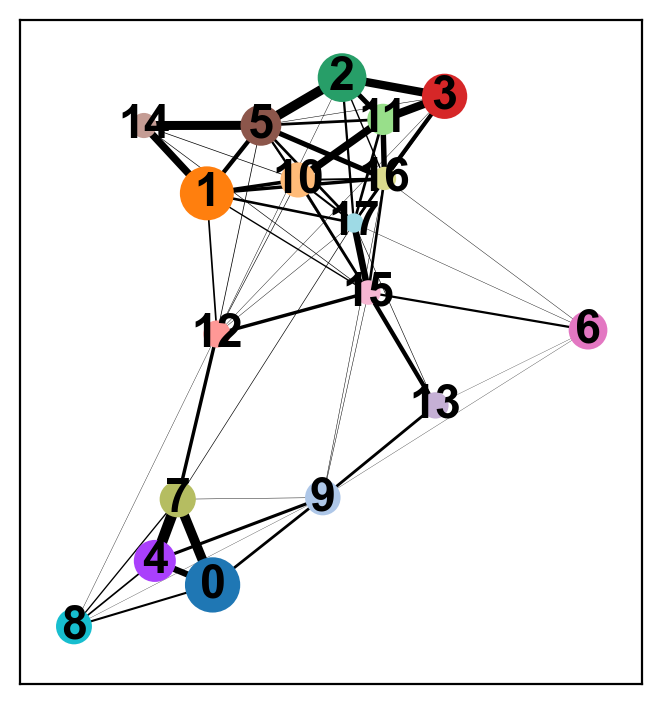

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:53)


In [79]:
sc.pp.neighbors(adata, n_neighbors=25, n_pcs=30, use_rep = 'X_pca_harmony')
sc.tl.leiden(adata, resolution=0.6)
sc.tl.paga(adata)
sc.pl.paga(adata, plot=True)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

We check again if the batch correction did well

/opt/homebrew/Caskroom/miniforge/base/envs/bioinformatics/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/homebrew/Caskroom/miniforge/base/envs/bioinformatics/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


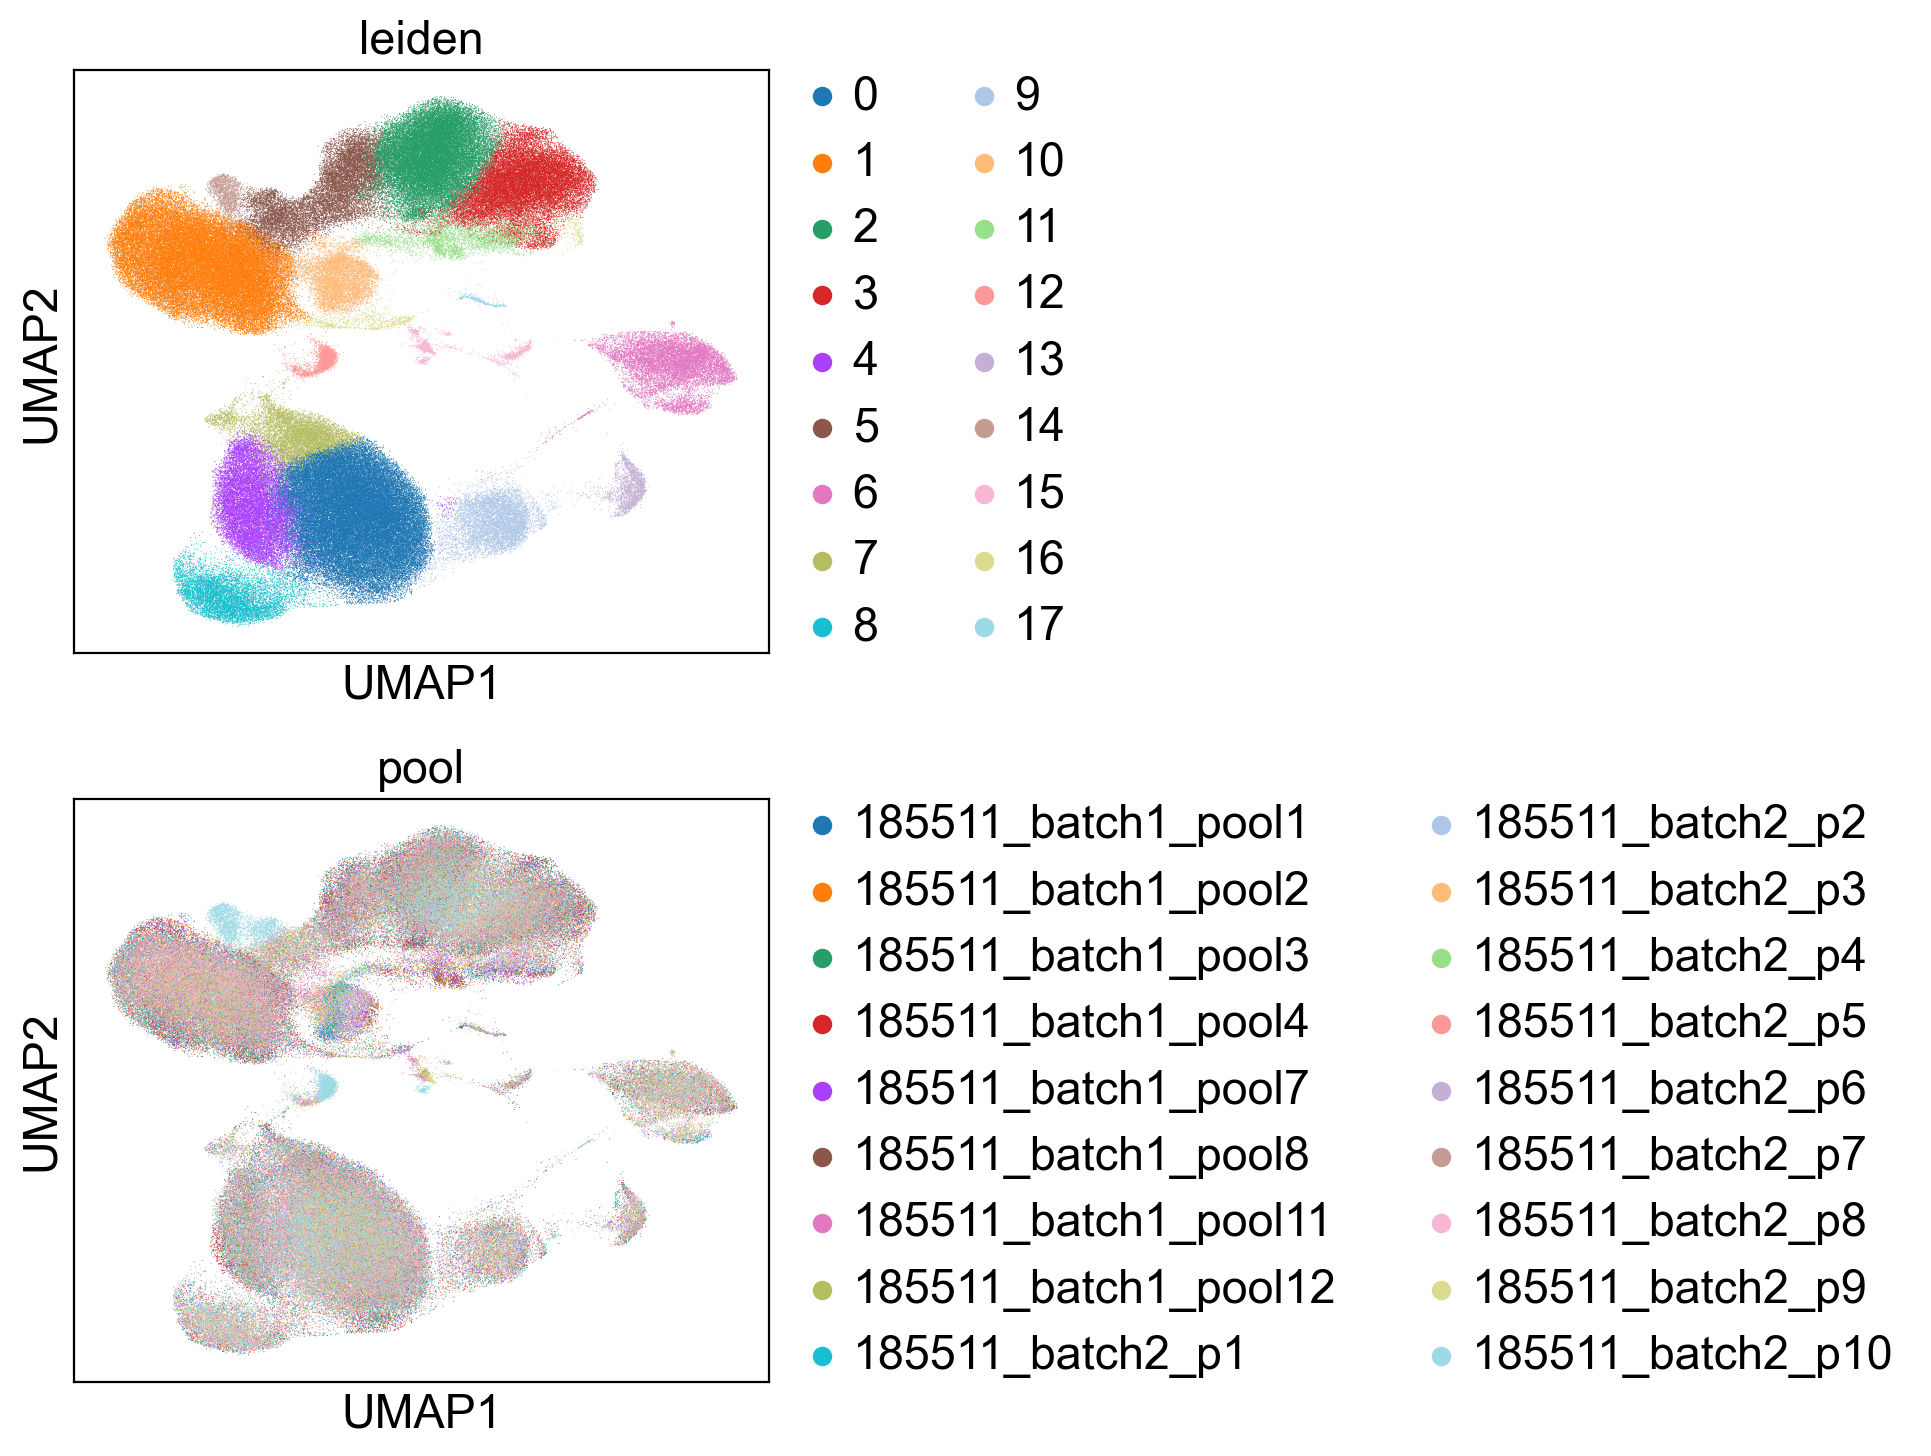

In [80]:
sc.pl.umap(adata, color =['leiden', 'pool'], ncols = 1, vmin = 0, vmax = 1, save = False)   # NK(CD161), NK (CD94)

It looks like the batch mixed well. Since each time umap run, it may have different image, so we save the current results to keep it the same. Later on, we only need to use the saved results.

In [81]:
adata.write_h5ad('./adata_batch1_batch2_batch_correction_with_harmony_and_umap.h5ad')

In [82]:
'PTPRC' in adata.var_names

False